# EDA

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

**Loading the dataset**

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:


df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')

df_info = df.info()
df_head = df.head()


print(df_info)
print(df_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Weather Measurements:


* Temperature: MinTemp, MaxTemp, Temp9am, Temp3pm

* Rain: Rainfall, RainToday (Yes/No)

* Evaporation/Sunshine: Evaporation, Sunshine

* Humidity: Humidity9am, Humidity3pm

* Pressure: Pressure9am, Pressure3pm

* Cloud: Cloud9am, Cloud3pm


Wind Features
* Wind Direction: WindGustDir, WindDir9am, WindDir3pm

* Wind Speed: WindGustSpeed, WindSpeed9am, WindSpeed3pm

Others
* Date: Date of observation
* Location: Weather station location

**Identify numeric and categorical features**

In [4]:

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()


print("Numeric Features:")
print(numeric_features)

print("\nCategorical Features:")
print(categorical_features)

Numeric Features:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Categorical Features:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [5]:

# Count unique values in each numeric column
print("Unique Value Counts for Numeric Columns")
for col in numeric_features:
    unique_count = df[col].nunique(dropna=True)
    print(f"{col}: {unique_count} unique values")

Unique Value Counts for Numeric Columns
MinTemp: 389 unique values
MaxTemp: 505 unique values
Rainfall: 681 unique values
Evaporation: 358 unique values
Sunshine: 145 unique values
WindGustSpeed: 67 unique values
WindSpeed9am: 43 unique values
WindSpeed3pm: 44 unique values
Humidity9am: 101 unique values
Humidity3pm: 101 unique values
Pressure9am: 546 unique values
Pressure3pm: 549 unique values
Cloud9am: 10 unique values
Cloud3pm: 10 unique values
Temp9am: 441 unique values
Temp3pm: 502 unique values


In [6]:
# Display unique values for Cloud9am and Cloud3pm
print("Unique values in Cloud9am:", sorted(df['Cloud9am'].dropna().unique()))
print("Unique values in Cloud3pm:", sorted(df['Cloud3pm'].dropna().unique()))

Unique values in Cloud9am: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0)]
Unique values in Cloud3pm: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0)]


In [7]:
df['Cloud9am'] = df['Cloud9am'].astype('category')
df['Cloud3pm'] = df['Cloud3pm'].astype('category')


**Calculate missing values and Handeling them**

In [8]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100


In [9]:

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)


missing_df = missing_df[missing_df['Missing Values'] > 0]
print("Missing Values Summary:")
print(missing_df)


Missing Values Summary:
               Missing Values  Percentage (%)
Sunshine                69835       48.009762
Evaporation             62790       43.166506
Cloud3pm                59358       40.807095
Cloud9am                55888       38.421559
Pressure9am             15065       10.356799
Pressure3pm             15028       10.331363
WindDir9am              10566        7.263853
WindGustDir             10326        7.098859
WindGustSpeed           10263        7.055548
Humidity3pm              4507        3.098446
WindDir3pm               4228        2.906641
Temp3pm                  3609        2.481094
RainTomorrow             3267        2.245978
Rainfall                 3261        2.241853
RainToday                3261        2.241853
WindSpeed3pm             3062        2.105046
Humidity9am              2654        1.824557
WindSpeed9am             1767        1.214767
Temp9am                  1767        1.214767
MinTemp                  1485        1.020899
MaxTemp   

Checking the distribtions for handeling missing values

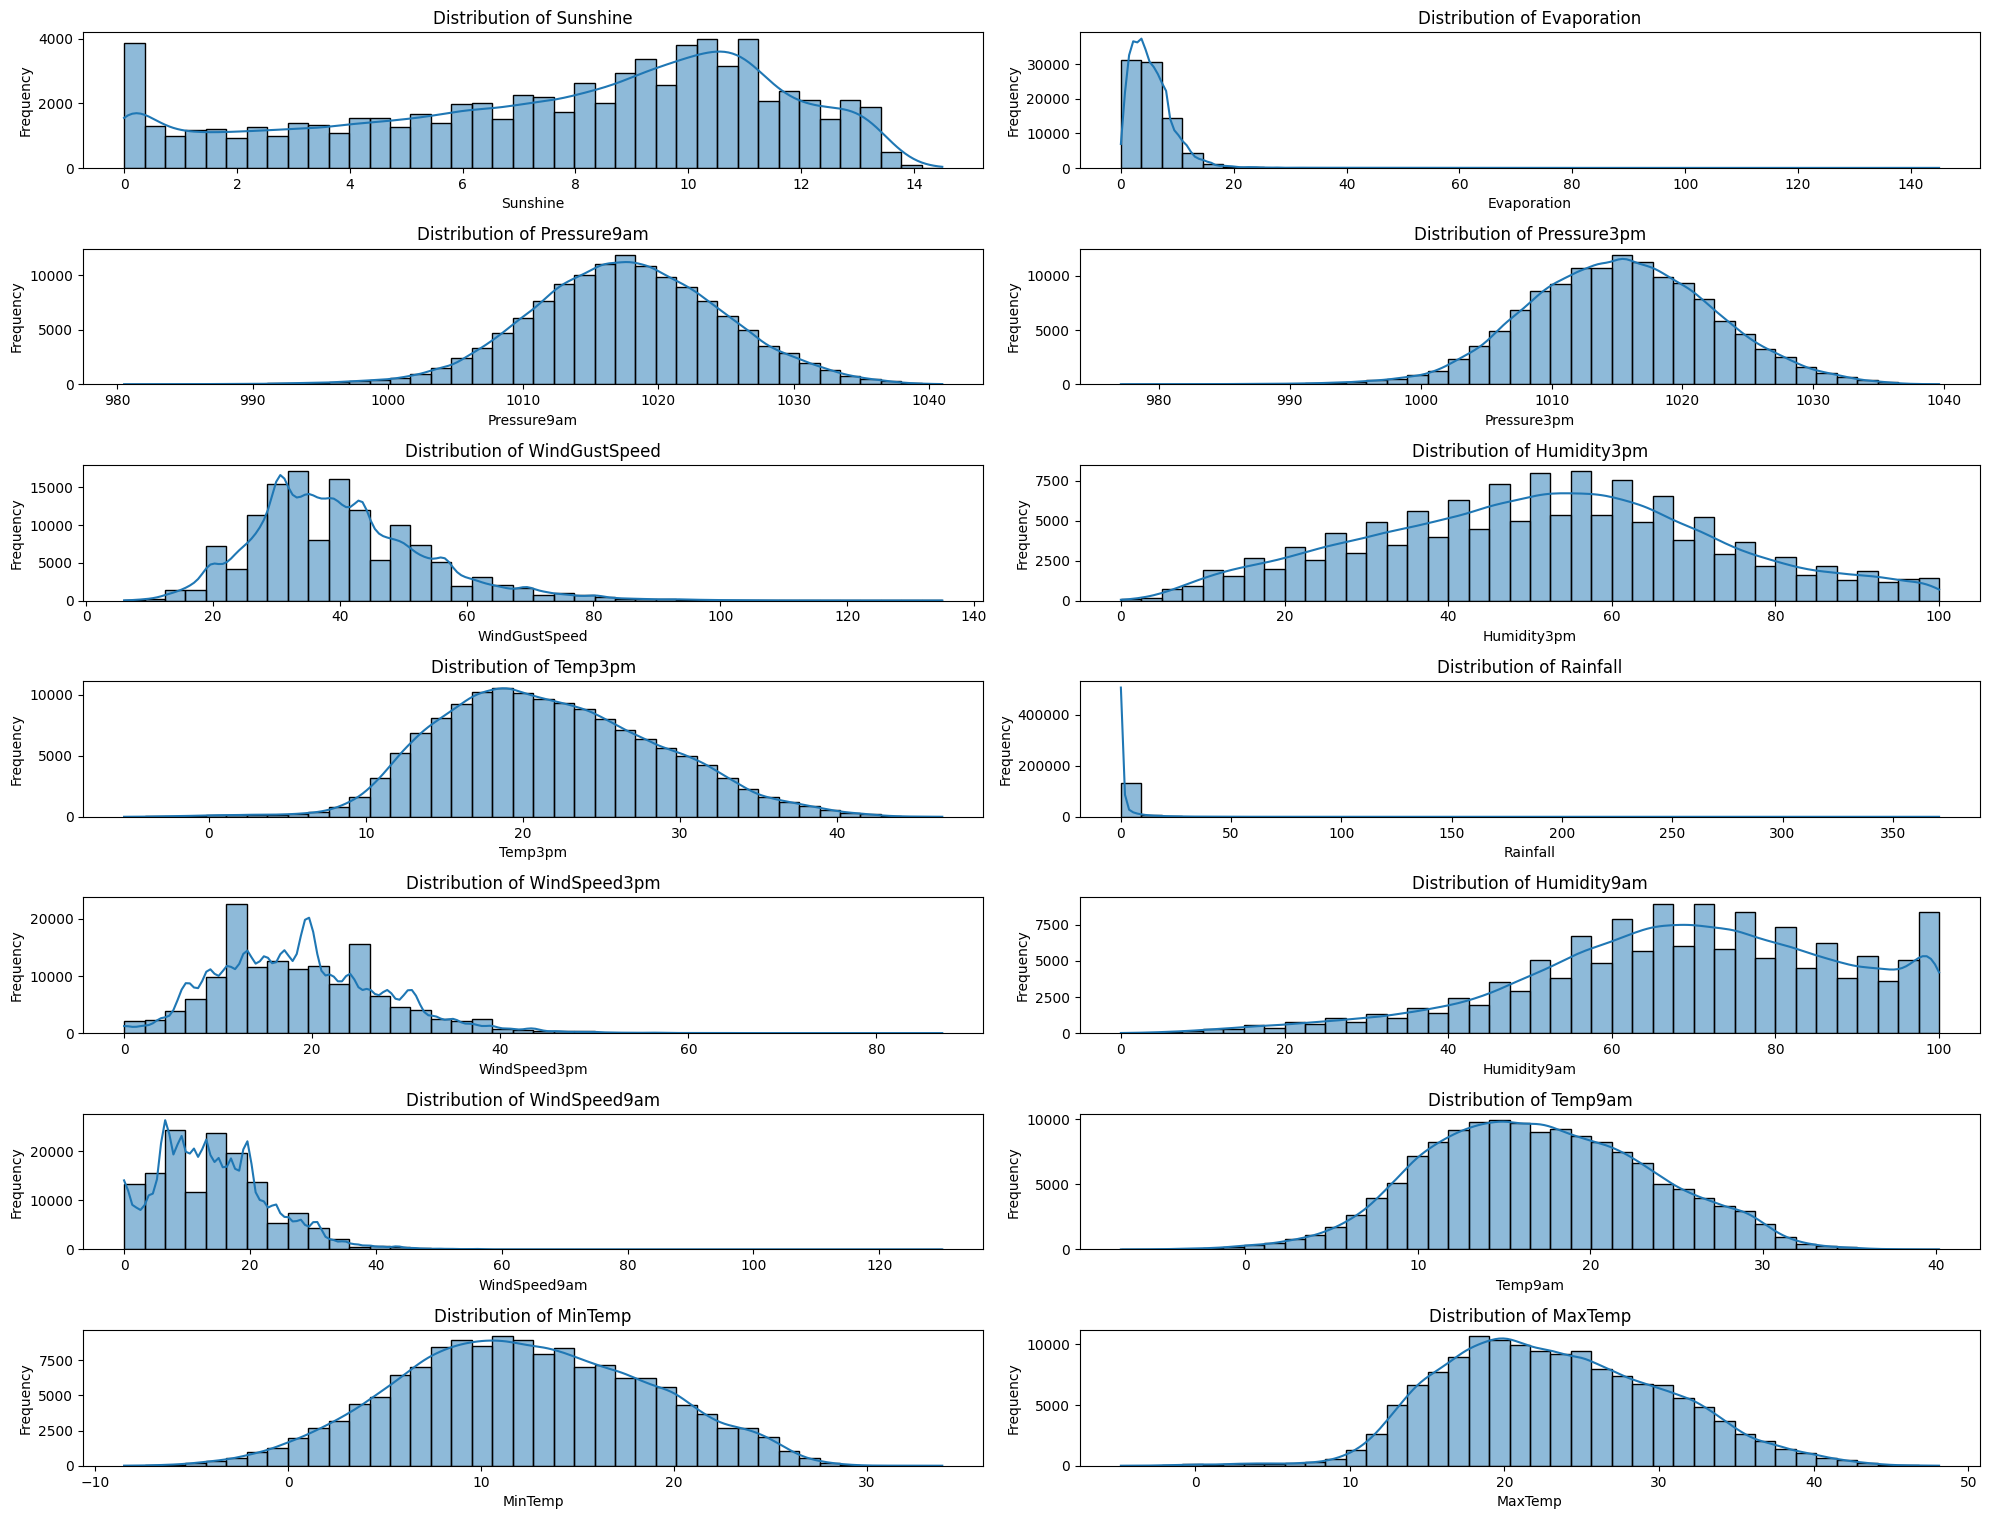

In [10]:
missing_cols = [
    'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Pressure9am',
    'Pressure3pm', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Rainfall',
    'WindSpeed3pm', 'Humidity9am', 'WindSpeed9am', 'Temp9am',
    'MinTemp', 'MaxTemp'
]


numeric_missing_cols = [col for col in missing_cols if col in df.select_dtypes(include=['float64', 'int64']).columns]

# Plot distributions
plt.figure(figsize=(20, 30))
for i, col in enumerate(numeric_missing_cols, 1):
    plt.subplot(len(numeric_missing_cols), 2, i)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

For numeric features, the distribution shape determines whether to use:

Mean (if normal)
Median (if skewed)
0 or custom value (if spikes at 0 like Rainfall)

 Features with Normal or Near-Normal Distribution → Use Mean or Median

| Feature       | Interpretation                          | Impute With |
| ------------- | --------------------------------------- | ----------- |
| `Temp3pm`     | Bell-shaped, centered \~22–24 °C        | **Mean**    |
| `Temp9am`     | Symmetric, centered \~18 °C             | **Mean**    |
| `MinTemp`     | Symmetric, mean \~12 °C                 | **Mean**    |
| `MaxTemp`     | Symmetric, mean \~24–26 °C              | **Mean**    |
| `Pressure9am` | Slightly left-skewed, but mostly normal | **Median**  |
| `Pressure3pm` | Similar to above                        | **Median**  |


Skewed or Bimodal → Use Median

| Feature         | Interpretation                       | Impute With |
| --------------- | ------------------------------------ | ----------- |
| `Humidity3pm`   | Uniform to slightly right-skewed     | **Median**  |
| `Humidity9am`   | Slightly right-skewed                | **Median**  |
| `WindGustSpeed` | Right-skewed with some high outliers | **Median**  |
| `WindSpeed9am`  | Right-skewed with peak at 0–10       | **Median**  |
| `WindSpeed3pm`  | Multi-modal, peaks at \~20           | **Median**  |


Highly Skewed → Use Median or Domain-Informed Value

| Feature       | Interpretation                                 | Impute With                                    |
| ------------- | ---------------------------------------------- | ---------------------------------------------- |
| `Rainfall`    | Very strong right skew — most values are **0** |    **Median** (depending on target bias) |
| `Evaporation` | Right-skewed with long tail                    | **Median**                                     |
| `Sunshine`    | Bimodal, right-skewed                          | **Median**                                     |


To ensure data quality and maximize model performance, each feature with missing values in the dataset has been carefully evaluated.


**Drop Columns with Excessive Missing Values (>35%):**
The following features have too many missing values to be reliably imputed and are not essential for initial modeling:

* Sunshine (48.01%)
* Evaporation (43.17%)
* Cloud3pm (40.81%)
* Cloud9am (38.42%)



**Impute Moderate-Missing Features (5%–35%)**

These features have manageable missingness. Imputation is appropriate:

* Median Imputation (for numeric features):
   Pressure9am, Pressure3pm, WindGustSpeed

* Mode Imputation (for categorical features):
   WindGustDir, WindDir9am

**Impute Low-Missing Features (<5%)**

These features will be imputed to retain as much data as possible:

* Median Imputation (for numeric features):
   Temp3pm, Humidity3pm, Humidity9am, WindSpeed9am, WindSpeed3pm, Temp9am, MinTemp, MaxTemp, Rainfall
* Mode Imputation (for categorical features):
   WindDir3pm


**Special Handling of Target Variable**

RainTomorrow (Target Variable): Missing in ~2.25% of rows.


Action: Drop rows where this is missing to avoid introducing target label noise.

In [11]:
#  Drop rows with missing target (RainTomorrow)
df.dropna(subset=['RainTomorrow'], inplace=True)

#  Drop columns with > 35% missing values
df.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], inplace=True)

#  Impute Normally Distributed Features with Mean
mean_impute_cols = ['Temp3pm', 'Temp9am', 'MinTemp', 'MaxTemp']
for col in mean_impute_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

#  Impute Skewed Features with Median
median_impute_cols = [
    'Pressure9am', 'Pressure3pm', 'Humidity3pm', 'Humidity9am',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'
]
for col in median_impute_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


#  Impute Rainfall using target-aware conditional medians
median_rain_yes = df[df['RainTomorrow'] == 'Yes']['Rainfall'].median()
median_rain_no = df[df['RainTomorrow'] == 'No']['Rainfall'].median()

df['Rainfall'] = df.apply(
    lambda row: median_rain_yes if pd.isna(row['Rainfall']) and row['RainTomorrow'] == 'Yes'
    else (median_rain_no if pd.isna(row['Rainfall']) else row['Rainfall']),
    axis=1
)




In [12]:
#  Impute categorical features with mode
categorical_impute_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in categorical_impute_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])



In [13]:
missing_after = df.isnull().sum()
print("\n Remaining missing values (if any):")
print(missing_after[missing_after > 0])


 Remaining missing values (if any):
Series([], dtype: int64)


**Visualizations after cleaning the missing values**

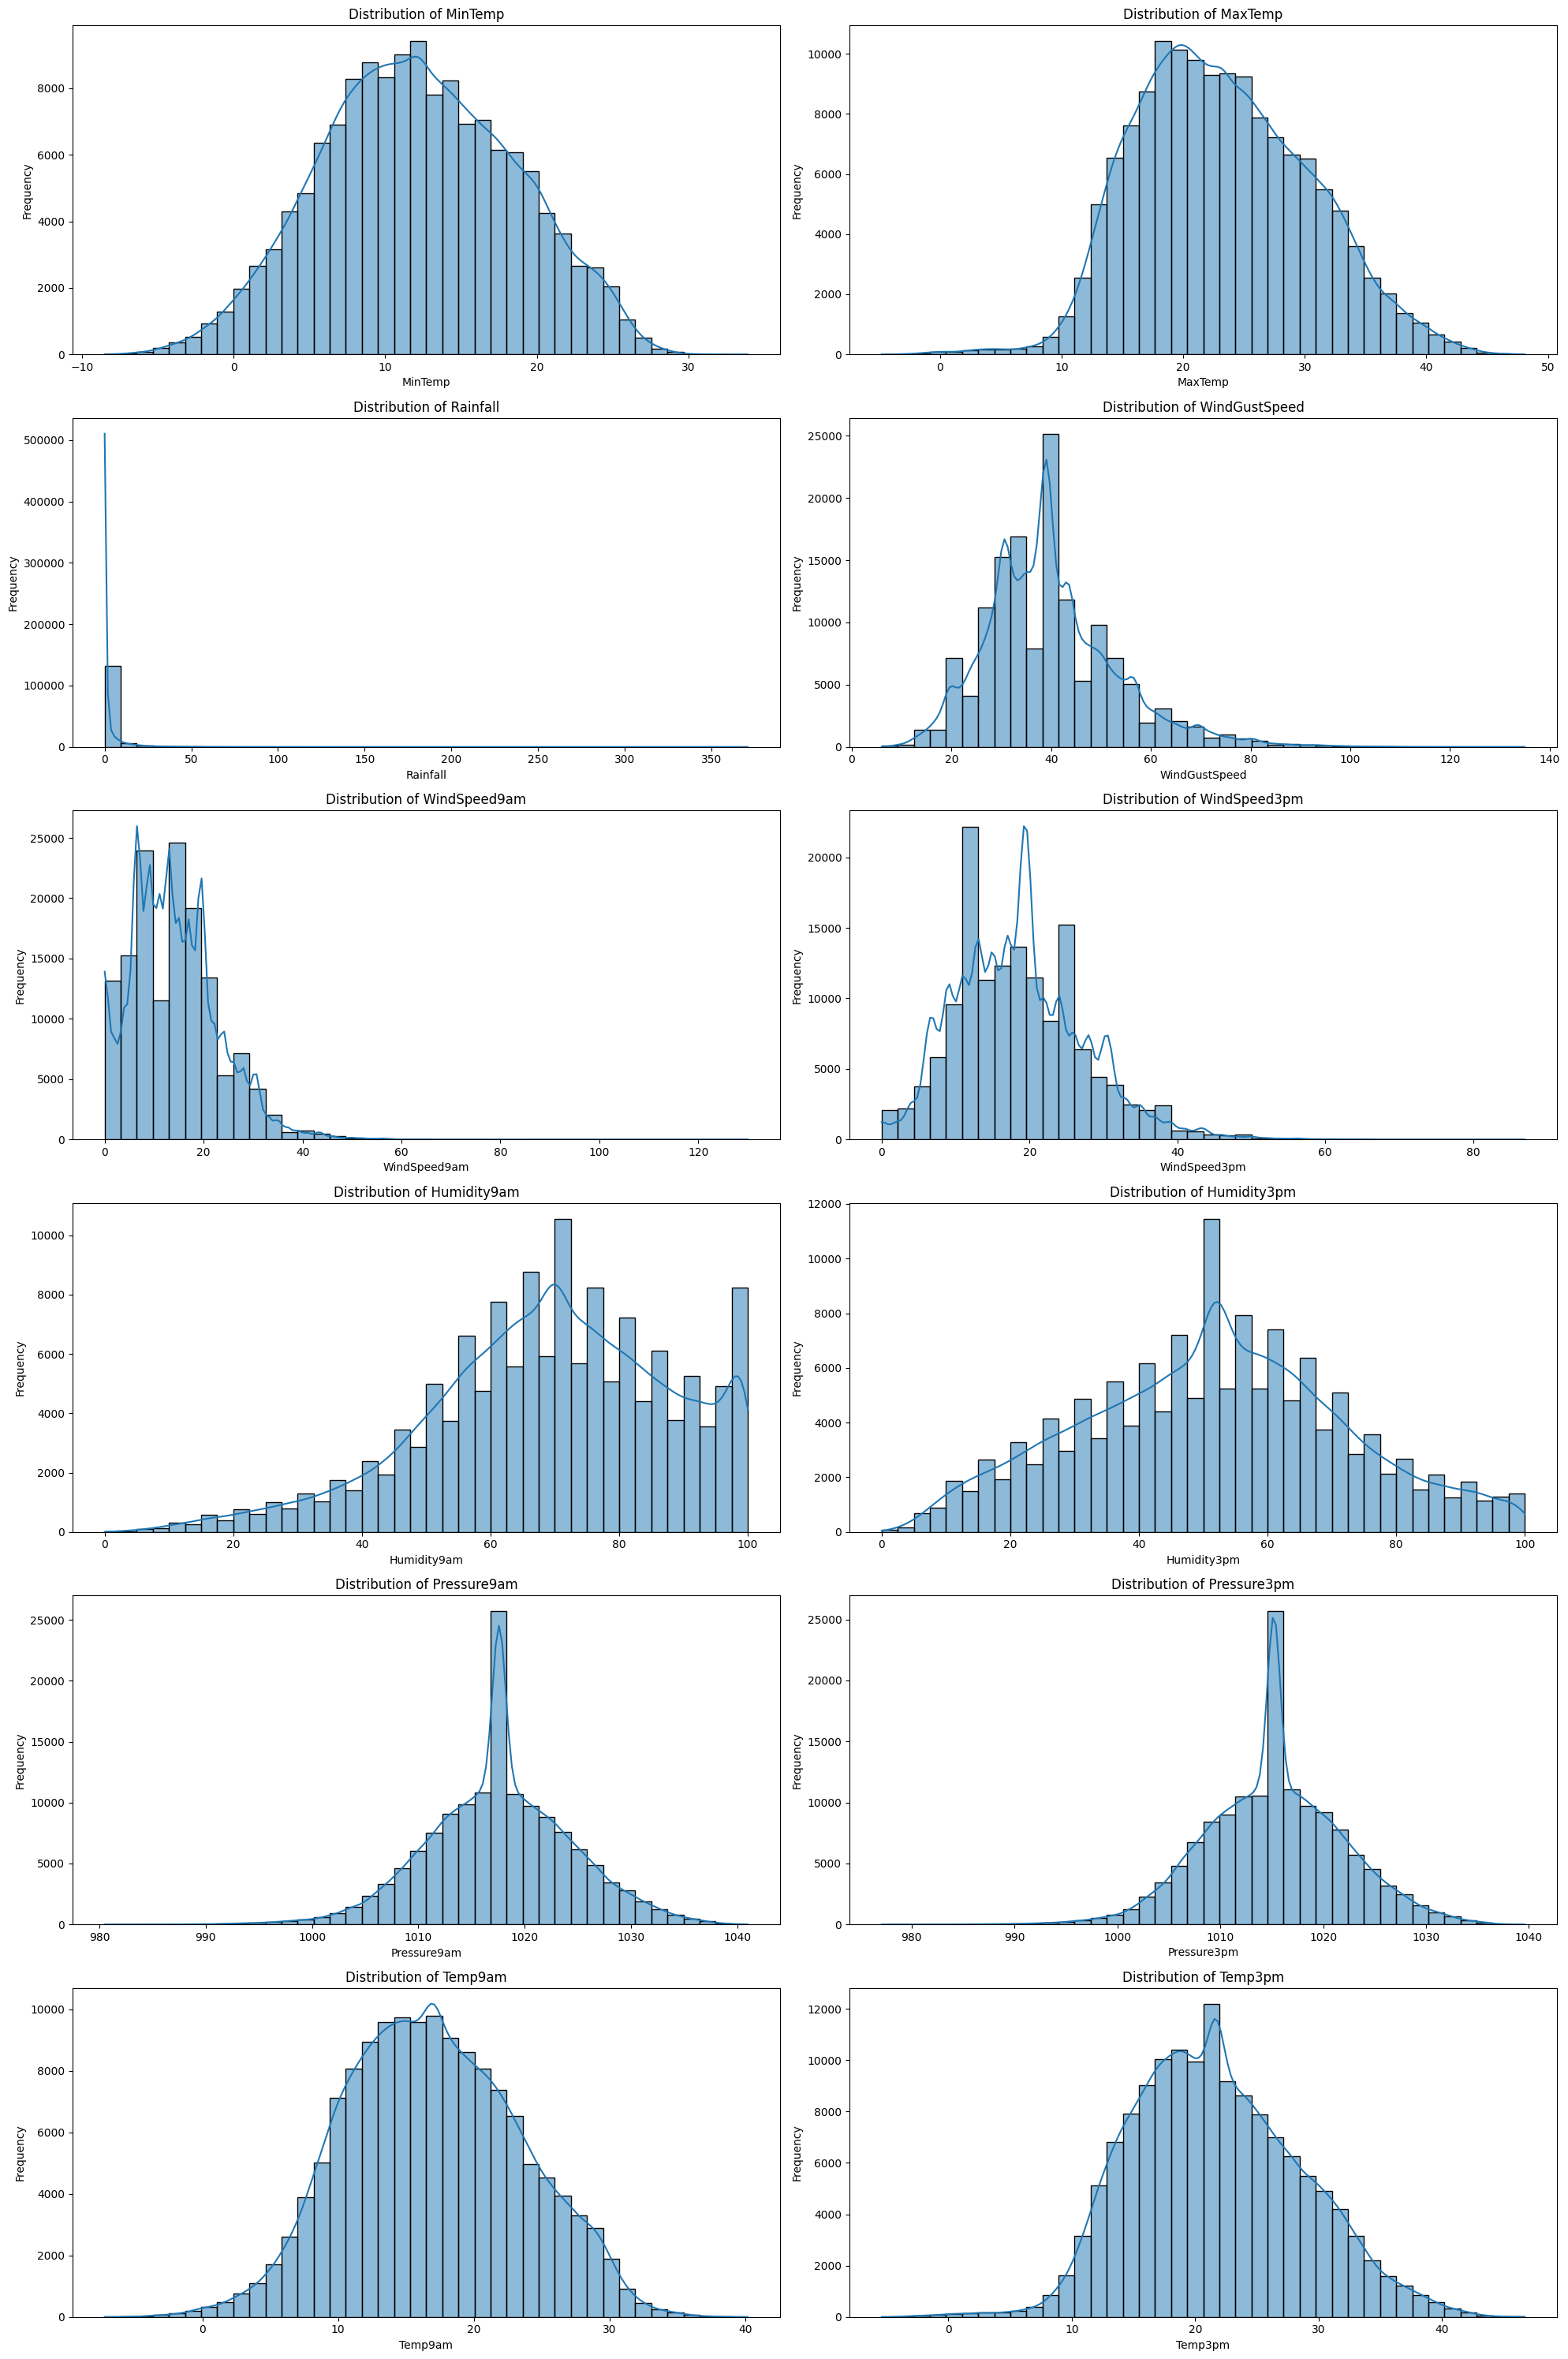

In [14]:
# Numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20, 30))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 1) // 2, 2, i)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


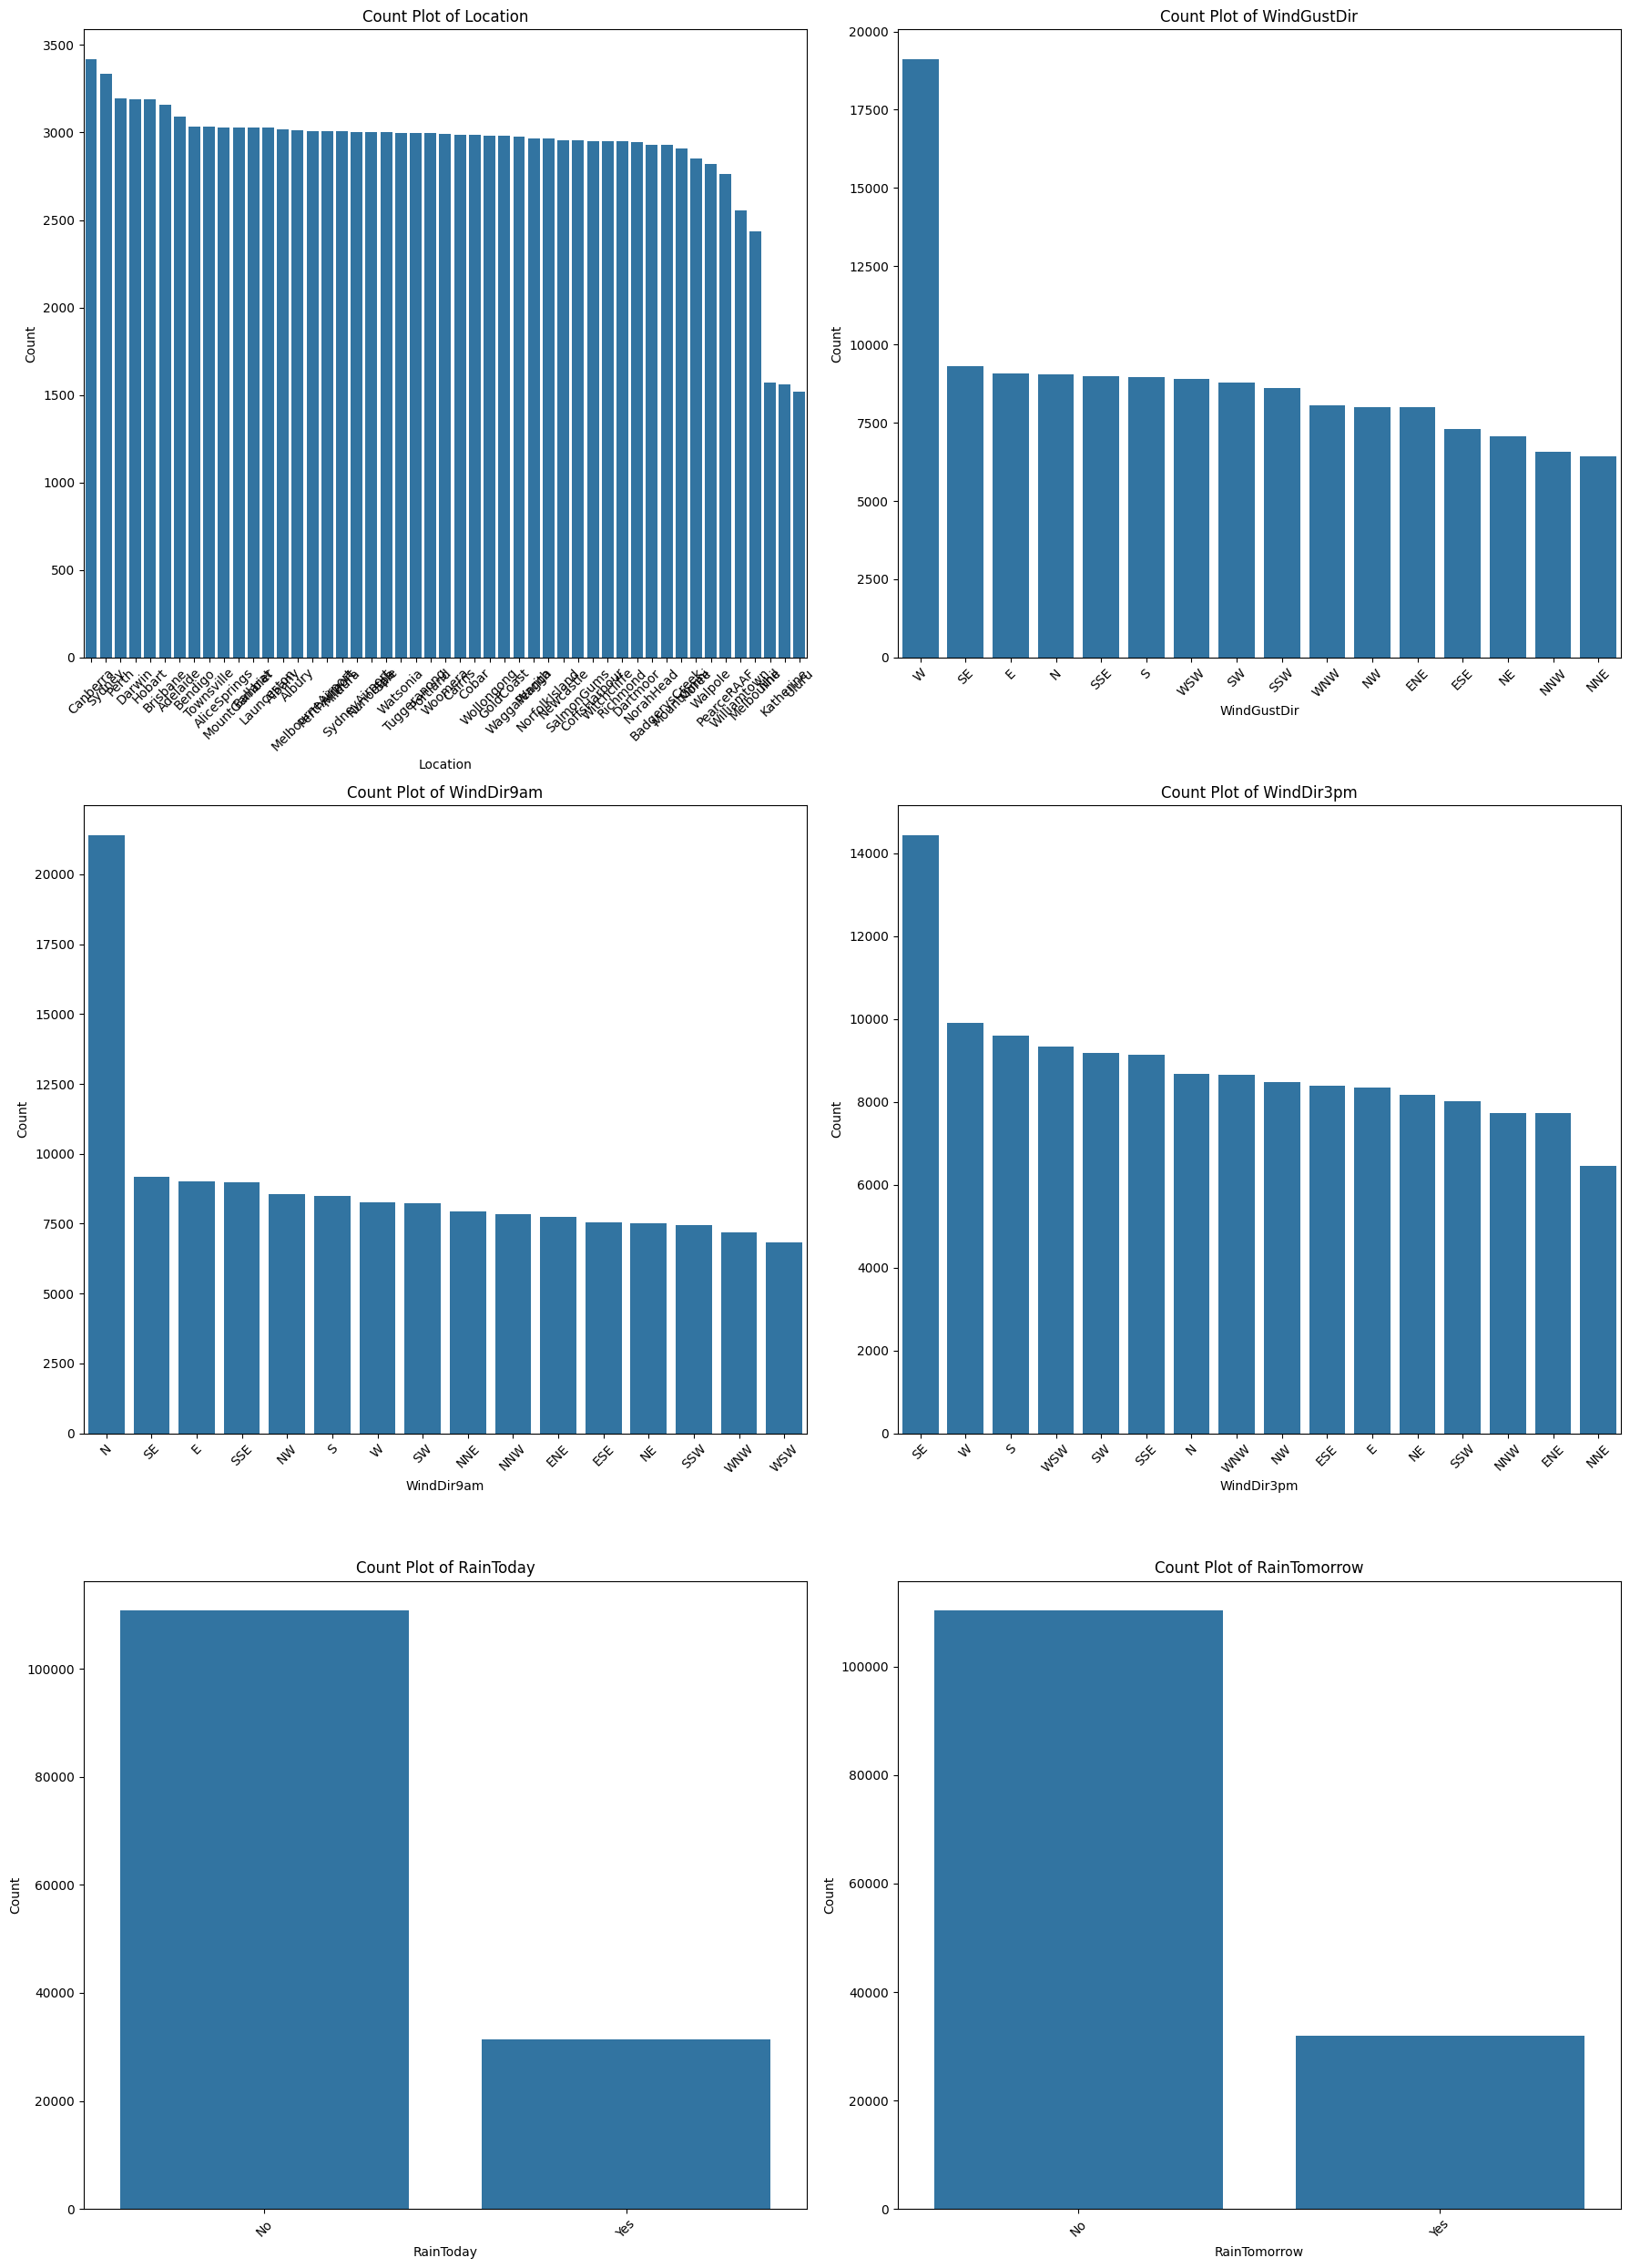

In [15]:
# Get categorical columns excluding 'Date'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Date']

# Plot count plots for remaining categorical features
plt.figure(figsize=(18, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 1) // 2, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

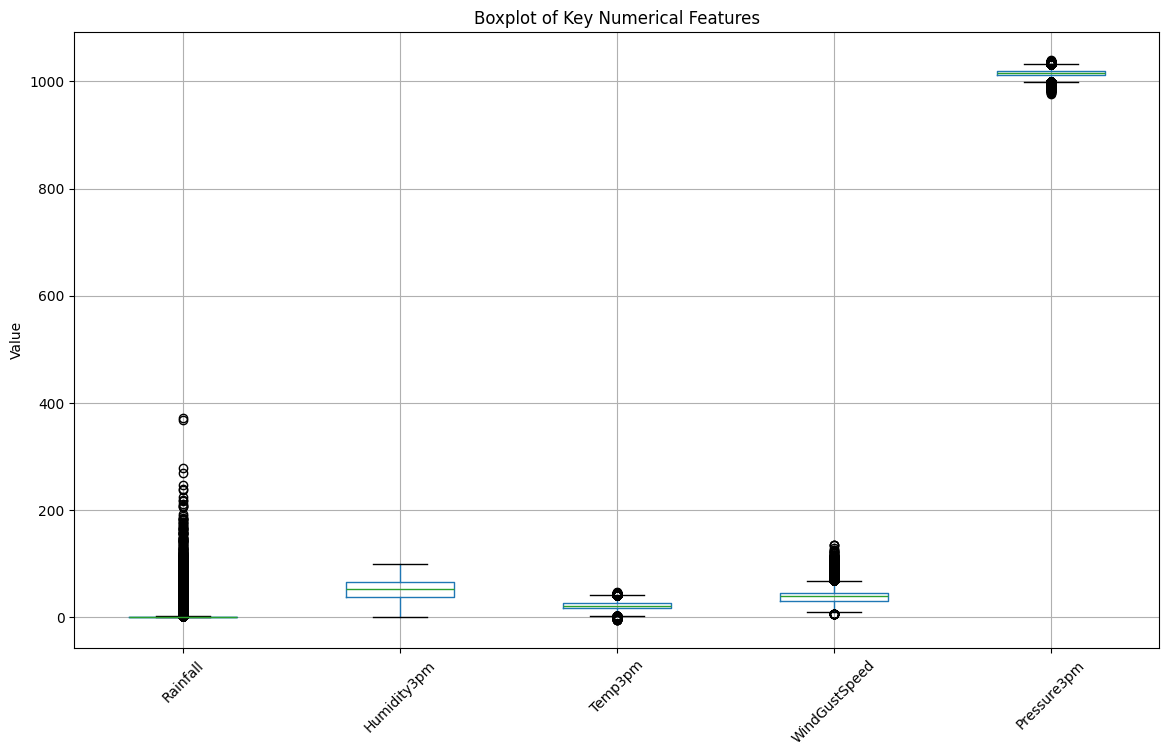

In [16]:
numeric_cols = ['Rainfall', 'Humidity3pm', 'Temp3pm', 'WindGustSpeed', 'Pressure3pm']

plt.figure(figsize=(14, 8))
df[numeric_cols].boxplot()
plt.title('Boxplot of Key Numerical Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


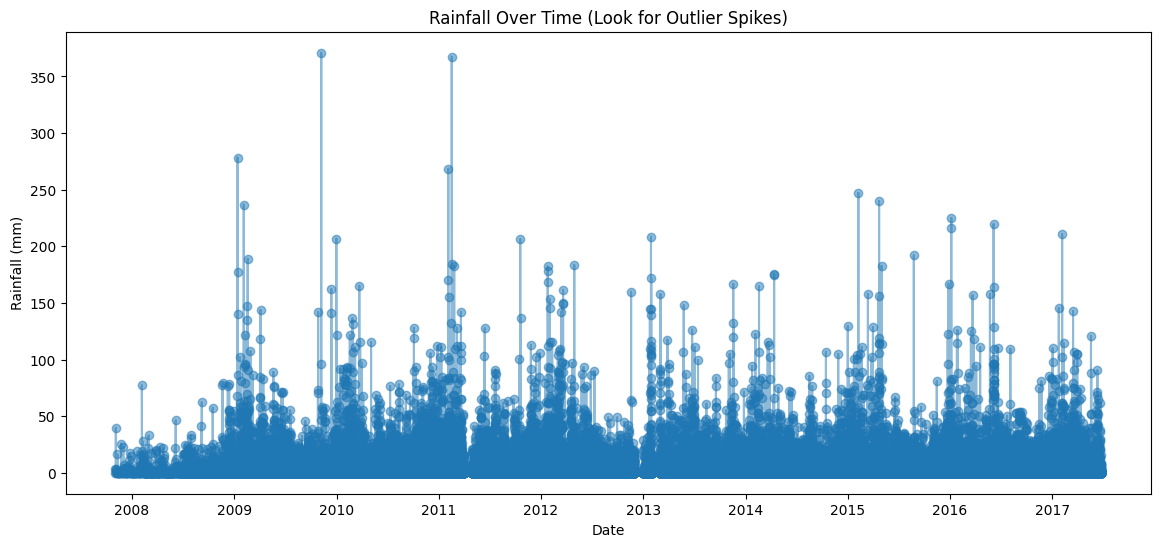

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values('Date')

plt.figure(figsize=(14, 6))
plt.plot(df_sorted['Date'], df_sorted['Rainfall'], marker='o', linestyle='-', alpha=0.5)
plt.title('Rainfall Over Time (Look for Outlier Spikes)')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.show()


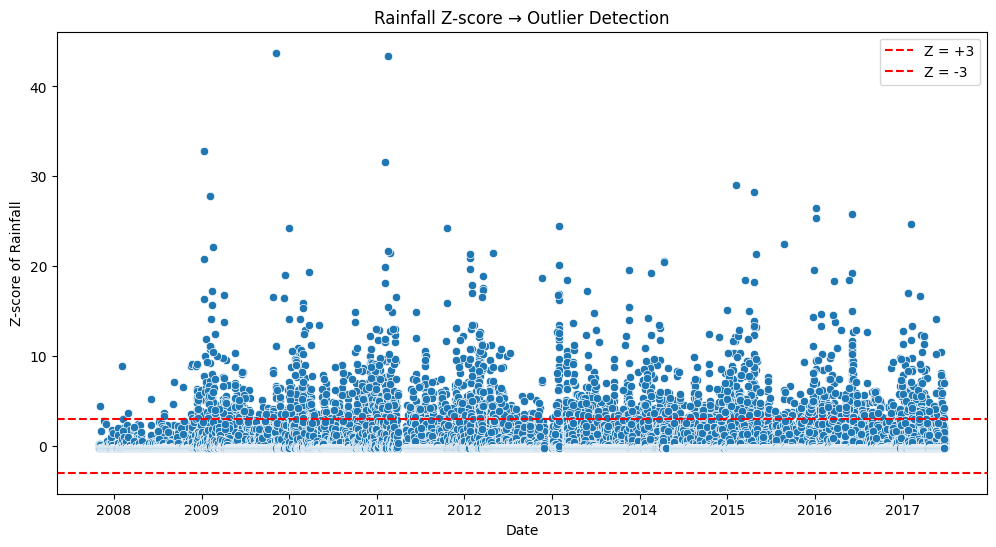

In [18]:

df['Rainfall_zscore'] = zscore(df['Rainfall'].fillna(0))

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Date'], y=df['Rainfall_zscore'])
plt.axhline(3, color='red', linestyle='--', label='Z = +3')
plt.axhline(-3, color='red', linestyle='--', label='Z = -3')
plt.title('Rainfall Z-score → Outlier Detection')
plt.xlabel('Date')
plt.ylabel('Z-score of Rainfall')
plt.legend()
plt.show()


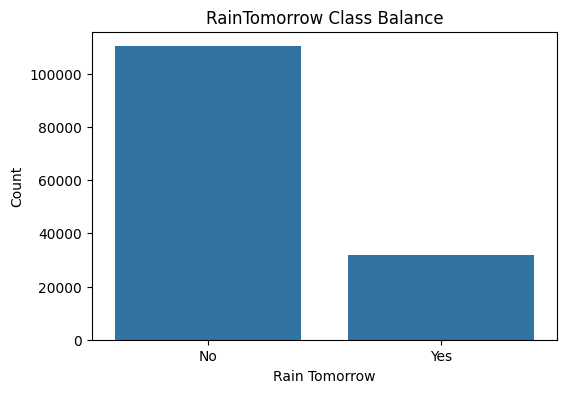

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=df)
plt.title('RainTomorrow Class Balance')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()


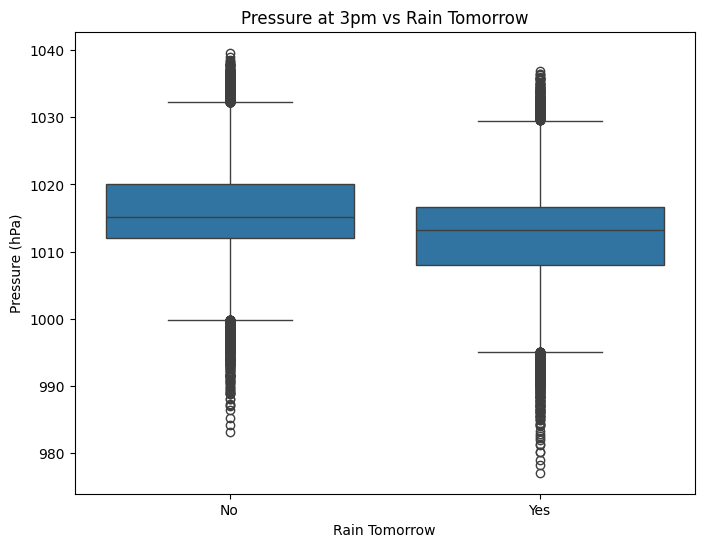

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='RainTomorrow', y='Pressure3pm', data=df)
plt.title('Pressure at 3pm vs Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Pressure (hPa)')
plt.show()


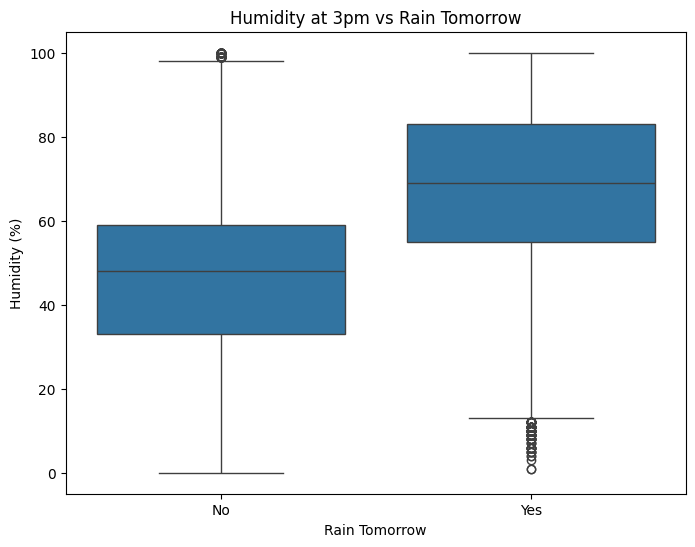

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)
plt.title('Humidity at 3pm vs Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Humidity (%)')
plt.show()


 Correlation Heatmap (Pearson)

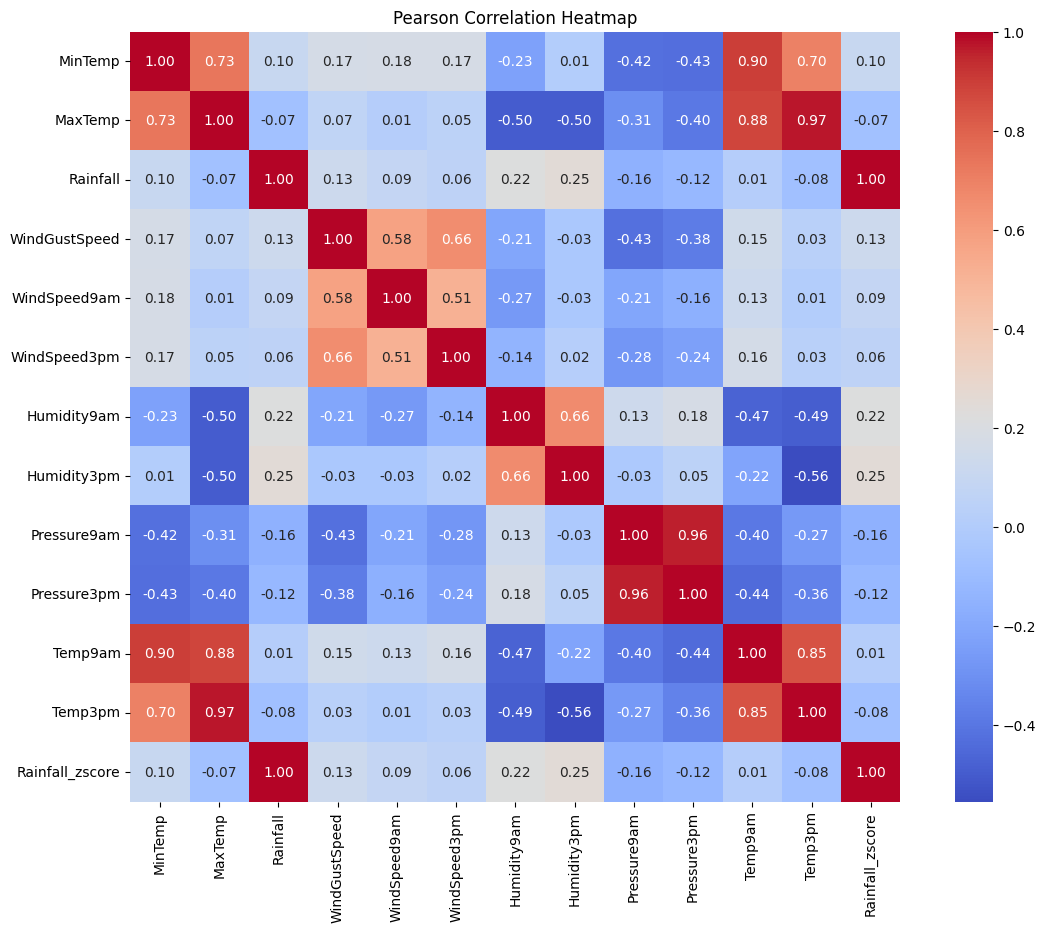

In [22]:


plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Pearson Correlation Heatmap')
plt.show()


Shows strong positive correlation between:
MinTemp, MaxTemp, Temp3pm, Temp9am (→ potential multicollinearity)
Pressure9am and Pressure3pm



Rainfall, Humidity, and WindGustSpeed have moderate,  information



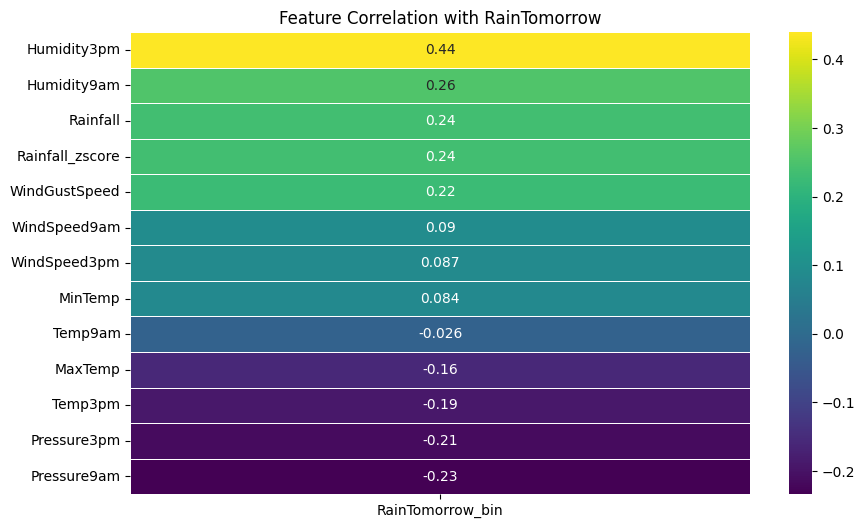

In [23]:


# Convert target to binary
df['RainTomorrow_bin'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(10, 6))
target_corr = df.corr(numeric_only=True)['RainTomorrow_bin'].drop('RainTomorrow_bin').sort_values(ascending=False)
sns.heatmap(target_corr.to_frame(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Feature Correlation with RainTomorrow')
plt.show()


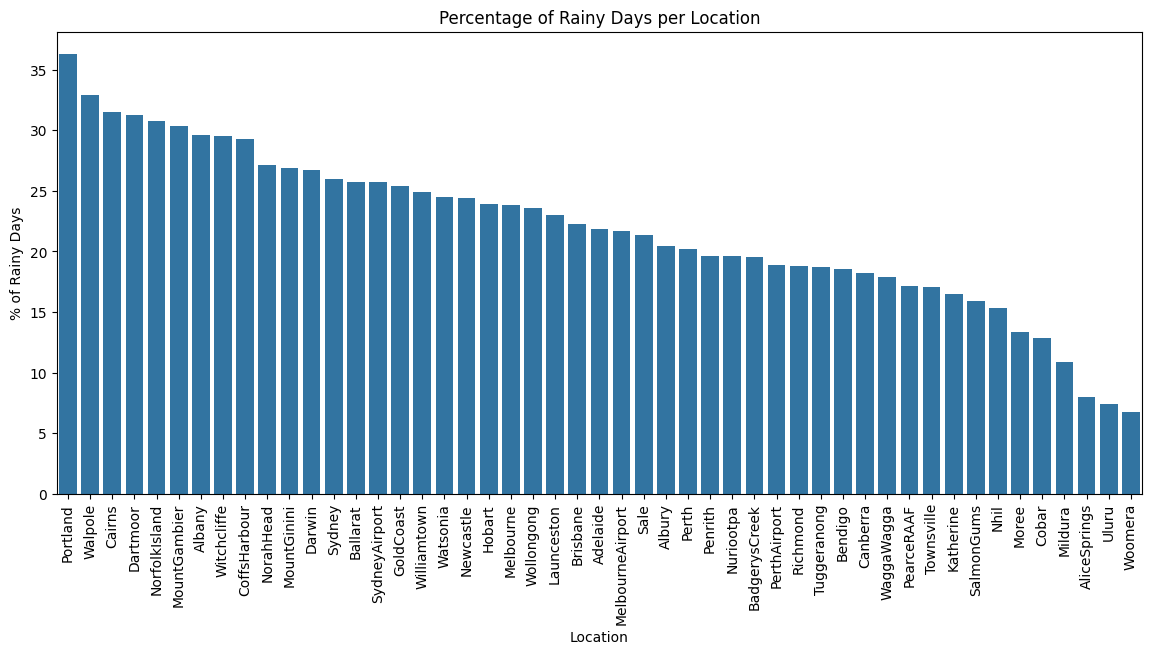

In [24]:
# % of days with rain per Location
rainy_days = df.groupby('Location')['RainToday'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=rainy_days.index, y=rainy_days.values)
plt.xticks(rotation=90)
plt.ylabel('% of Rainy Days')
plt.title('Percentage of Rainy Days per Location')
plt.show()


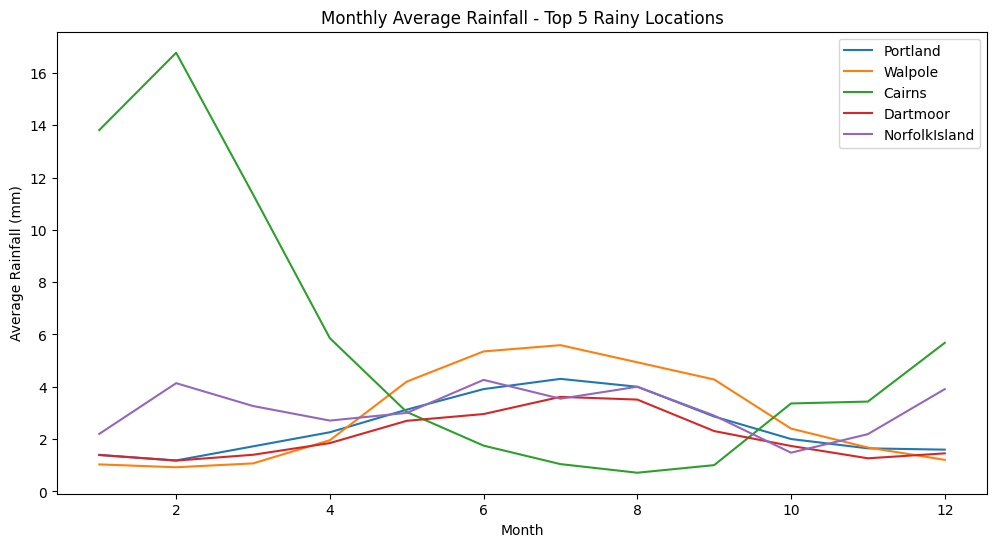

In [25]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month

# Example for top 5 rainy locations
top_locations = rainy_days.head(5).index.tolist()

plt.figure(figsize=(12, 6))
for loc in top_locations:
    df_loc = df[df['Location'] == loc]
    monthly_rainfall = df_loc.groupby('Month')['Rainfall'].mean()
    plt.plot(monthly_rainfall.index, monthly_rainfall.values, label=loc)

plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Monthly Average Rainfall - Top 5 Rainy Locations')
plt.legend()
plt.show()


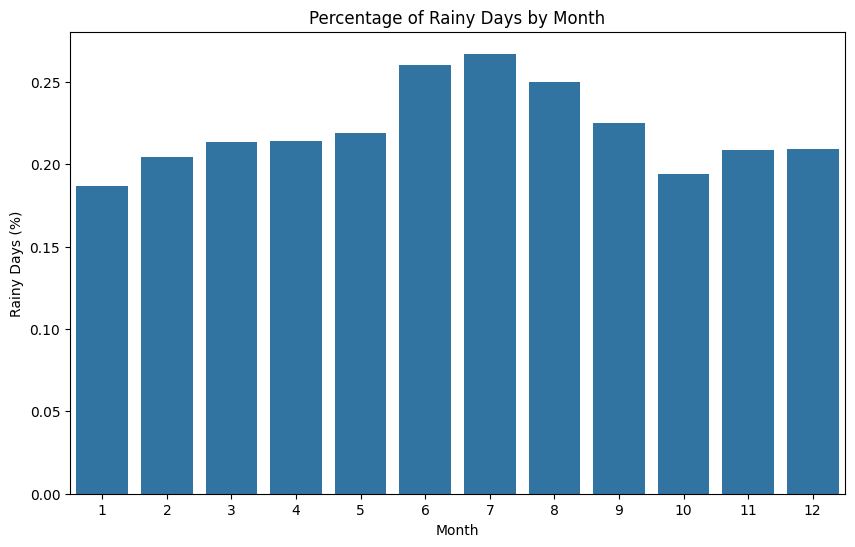

In [26]:
df['Month'] = df['Date'].dt.month
df['RainTodayBool'] = df['RainToday'].map({'No': 0, 'Yes': 1})

monthly_rain = df.groupby('Month')['RainTodayBool'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_rain.index, y=monthly_rain.values)
plt.title('Percentage of Rainy Days by Month')
plt.ylabel('Rainy Days (%)')
plt.xlabel('Month')
plt.show()


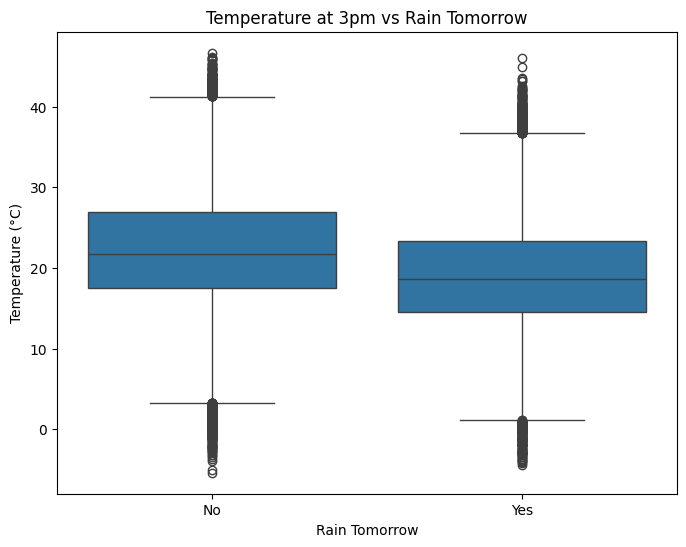

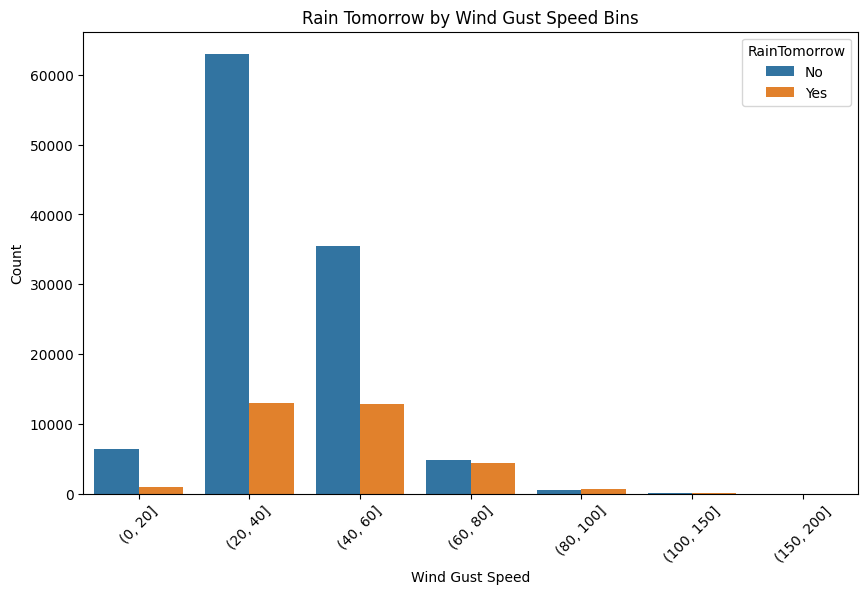

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='RainTomorrow', y='Temp3pm', data=df)
plt.title('Temperature at 3pm vs Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Temperature (°C)')
plt.show()
df['WindGustSpeed_bin'] = pd.cut(df['WindGustSpeed'], bins=[0, 20, 40, 60, 80, 100, 150, 200])

plt.figure(figsize=(10, 6))
sns.countplot(x='WindGustSpeed_bin', hue='RainTomorrow', data=df)
plt.title('Rain Tomorrow by Wind Gust Speed Bins')
plt.xlabel('Wind Gust Speed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


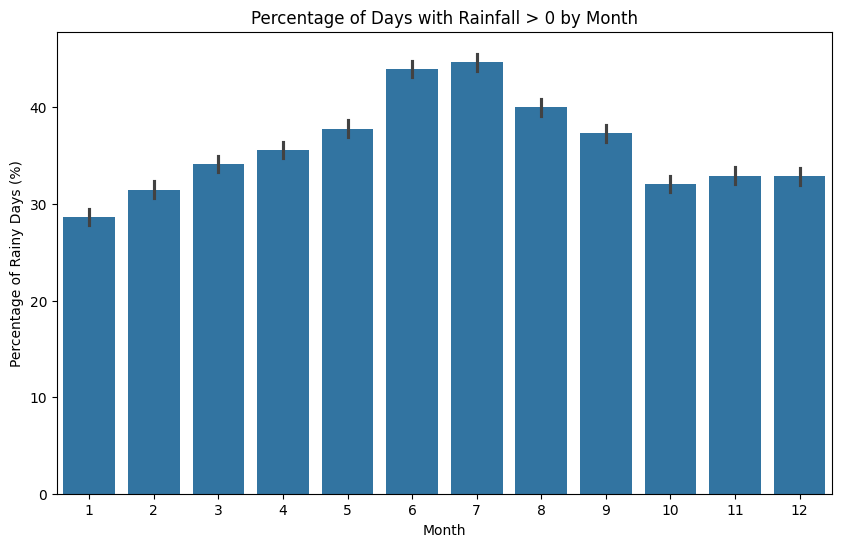

In [28]:
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Rainfall', data=df, estimator=lambda x: (x>0).mean()*100)
plt.title('Percentage of Days with Rainfall > 0 by Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Rainy Days (%)')
plt.show()


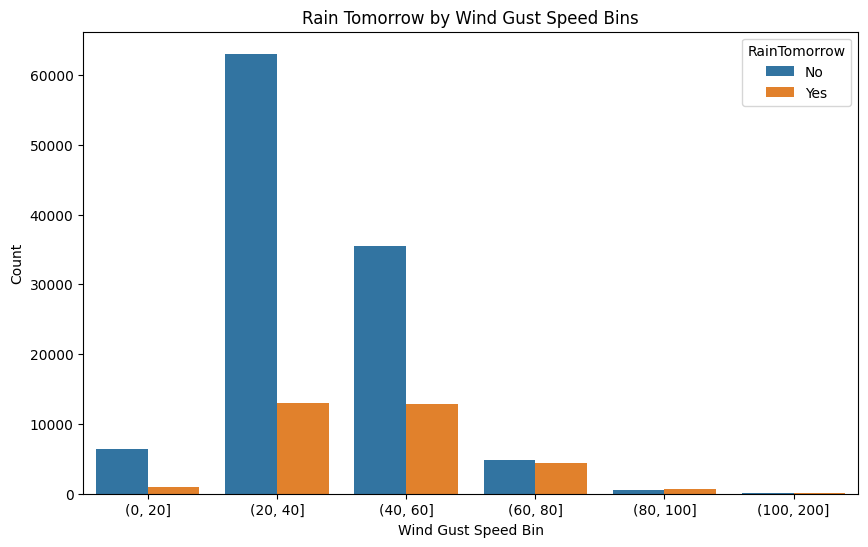

In [29]:
df['WindGustSpeed_bin'] = pd.cut(df['WindGustSpeed'], bins=[0, 20, 40, 60, 80, 100, 200])

plt.figure(figsize=(10, 6))
sns.countplot(x='WindGustSpeed_bin', hue='RainTomorrow', data=df)
plt.title('Rain Tomorrow by Wind Gust Speed Bins')
plt.xlabel('Wind Gust Speed Bin')
plt.ylabel('Count')
plt.show()



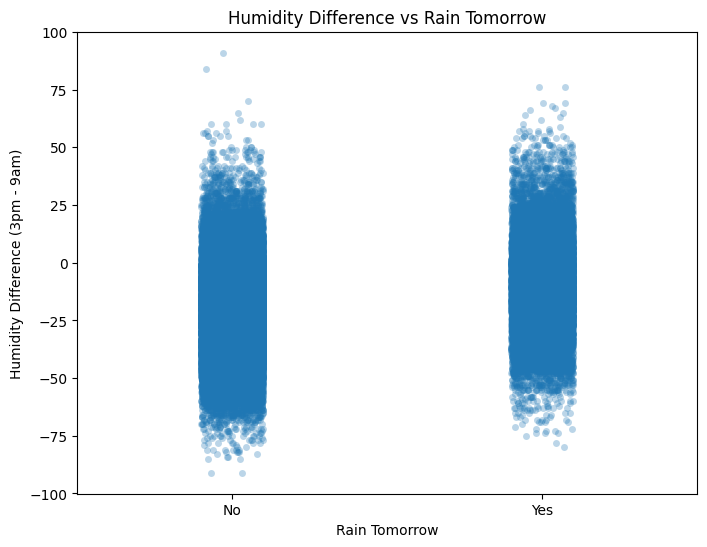

In [30]:
df['HumidityDiff'] = df['Humidity3pm'] - df['Humidity9am']

plt.figure(figsize=(8, 6))
sns.stripplot(x='RainTomorrow', y='HumidityDiff', data=df, jitter=True, alpha=0.3)
plt.title('Humidity Difference vs Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Humidity Difference (3pm - 9am)')
plt.show()


Top correlated features with RainTomorrow:
Humidity3pm (0.44)
Humidity9am (0.26)
Rainfall (0.24)
WindGustSpeed (0.22)
Negative correlation with Pressure, Temp3pm, MaxTemp

 Implication: Prioritize Humidity3pm, Rainfall, Pressure for modeling.

Cramér's V Heatmap – for Categorical Variables

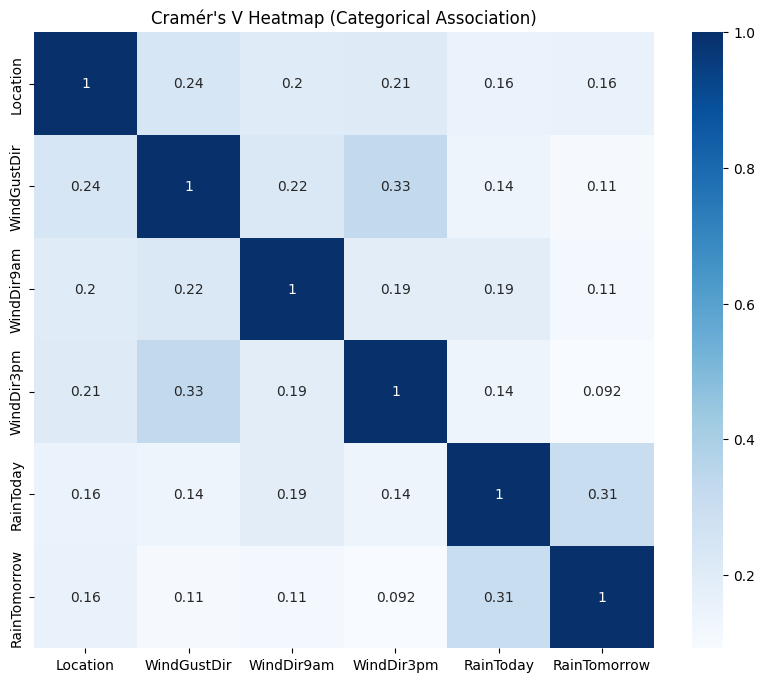

In [31]:
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute Cramér's V for all categorical pairs
cat_cols = df.select_dtypes(include='object').columns

cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramer_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap='Blues')
plt.title("Cramér's V Heatmap (Categorical Association)")
plt.show()


RainToday has the strongest relationship with RainTomorrow (0.31)

Weak associations among other wind direction features

**Anova Test**

In [32]:
# Encode the target variable
df['RainTomorrow_encoded'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Select numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['RainTomorrow_encoded'])

# Perform ANOVA F-test
f_values, p_values = f_classif(numeric_features, df['RainTomorrow_encoded'])

# Create result DataFrame
anova_results = pd.DataFrame({
    'Feature': numeric_features.columns,
    'F-Score': f_values,
    'p-Value': p_values
}).sort_values(by='F-Score', ascending=False)

# Show ranked features
print(anova_results)


             Feature       F-Score        p-Value
13  RainTomorrow_bin           inf   0.000000e+00
7        Humidity3pm  3.408725e+04   0.000000e+00
14     RainTodayBool  1.474853e+04   0.000000e+00
15      HumidityDiff  1.004240e+04   0.000000e+00
6        Humidity9am  9.913249e+03   0.000000e+00
2           Rainfall  8.382880e+03   0.000000e+00
12   Rainfall_zscore  8.382880e+03   0.000000e+00
8        Pressure9am  8.238433e+03   0.000000e+00
3      WindGustSpeed  7.565671e+03   0.000000e+00
9        Pressure3pm  6.870120e+03   0.000000e+00
11           Temp3pm  5.342008e+03   0.000000e+00
1            MaxTemp  3.692099e+03   0.000000e+00
4       WindSpeed9am  1.172788e+03  5.567611e-256
5       WindSpeed3pm  1.083775e+03  8.694245e-237
0            MinTemp  1.003593e+03  1.738659e-219
10           Temp9am  9.311313e+01   5.016357e-22


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


All p-values are < 0.05, so every numeric feature is statistically significant for classifying RainTomorrow.


| Rank | Feature                         | F-Score       | Interpretation                                                             |
| ---- | ------------------------------- | ------------- | -------------------------------------------------------------------------- |
| 1    | `Humidity3pm`                   | **34,087**    | Most predictive — strong difference in means across `RainTomorrow` classes |
| 2    | `Humidity9am`                   | 9,913         | Highly predictive                                                          |
| 3    | `Rainfall`                      | 8,383         | Predicts tomorrow's rain quite well                                        |
| 4    | `Pressure9am`                   | 8,238         | Strong relationship with rain                                              |
| 5    | `WindGustSpeed`                 | 7,566         | Wind conditions are a useful indicator                                     |
| ...  | `Temp3pm`, `MaxTemp`, `MinTemp` | 5,342 → 1,003 | Still informative, but less than humidity/pressure                         |


<ipython-input-33-3552949723>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_results, x='F-Score', y='Feature', palette='viridis')


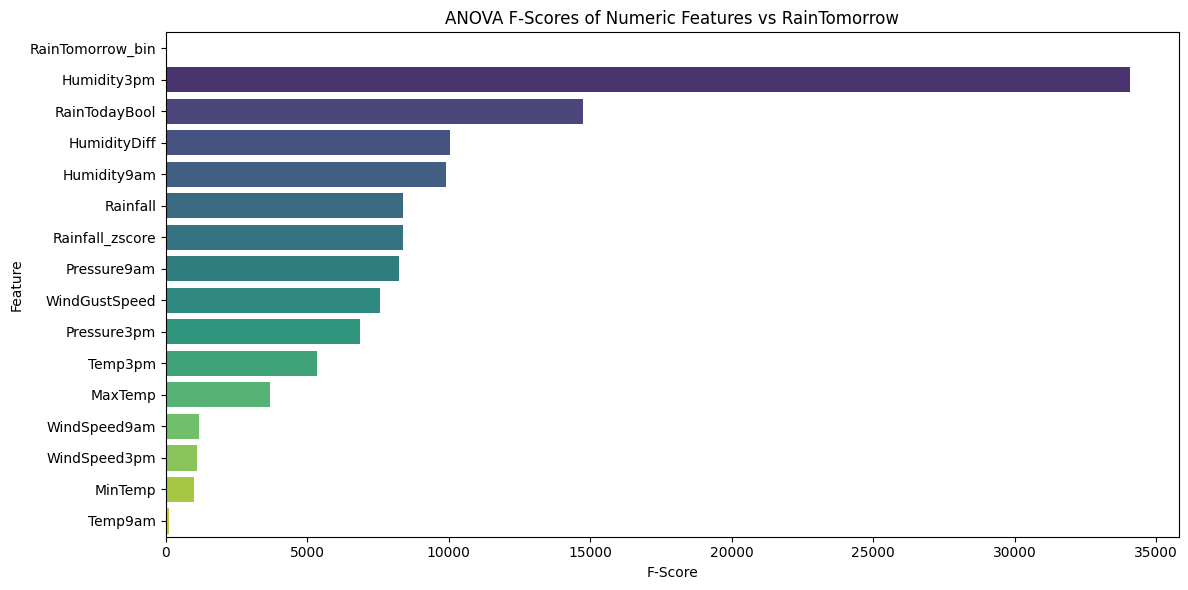

In [33]:
# Bar plot of F-scores
plt.figure(figsize=(12, 6))
sns.barplot(data=anova_results, x='F-Score', y='Feature', palette='viridis')
plt.title('ANOVA F-Scores of Numeric Features vs RainTomorrow')
plt.xlabel('F-Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Top features: Humidity3pm, Humidity9am, Rainfall, Pressure9am, WindGustSpeed
Aligns closely with point-biserial insights


Implication: Statistically confirms which features significantly separate classes.

# Preprocessing

In [34]:
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**we  have already handled missing values**

**Outlier checking**

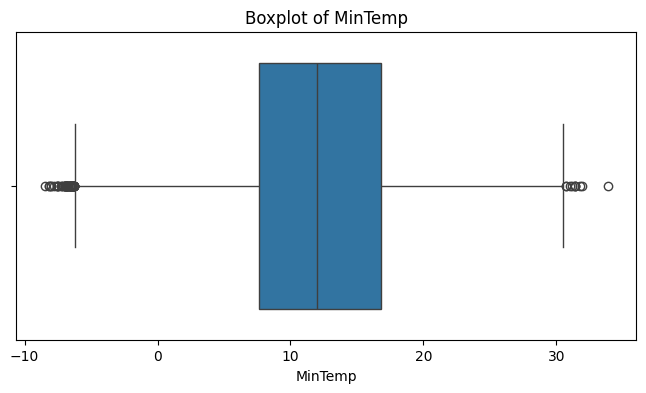

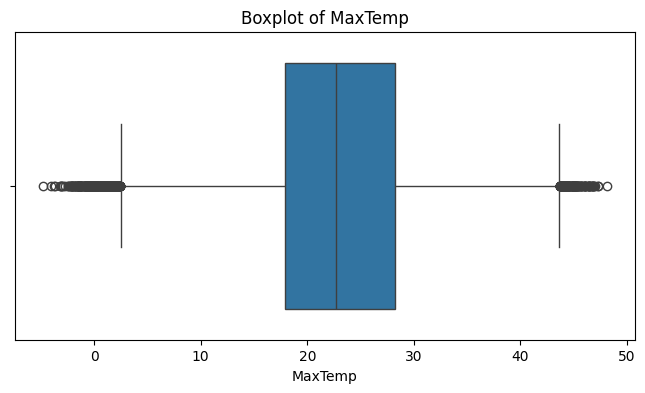

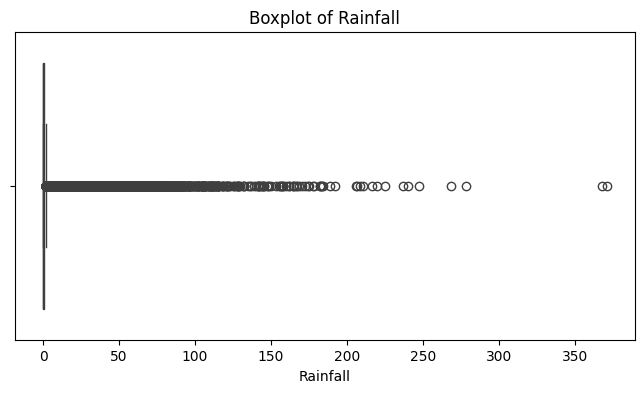

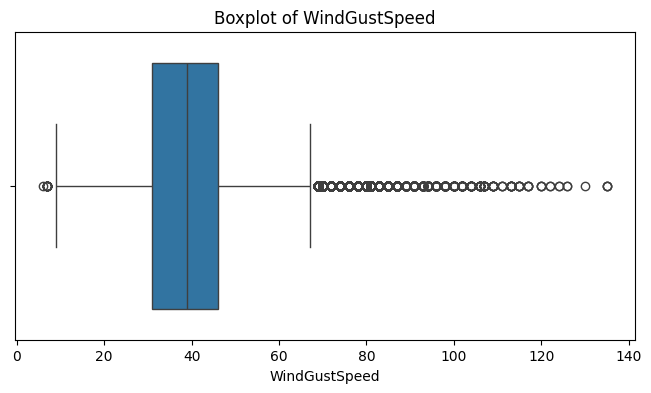

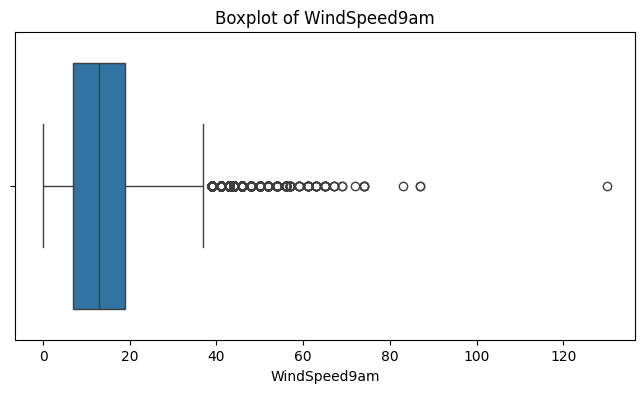

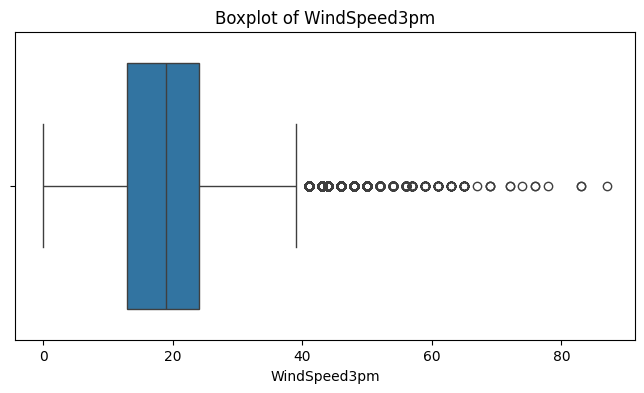

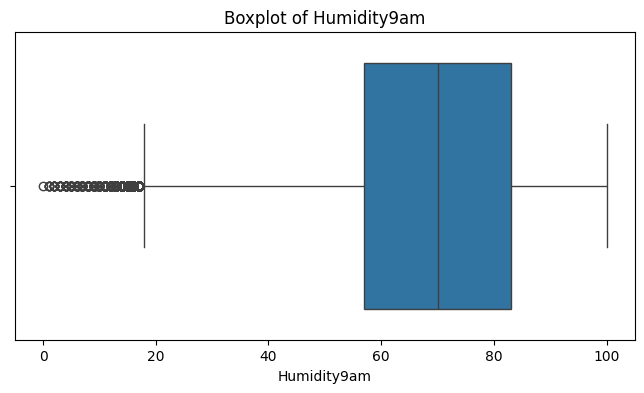

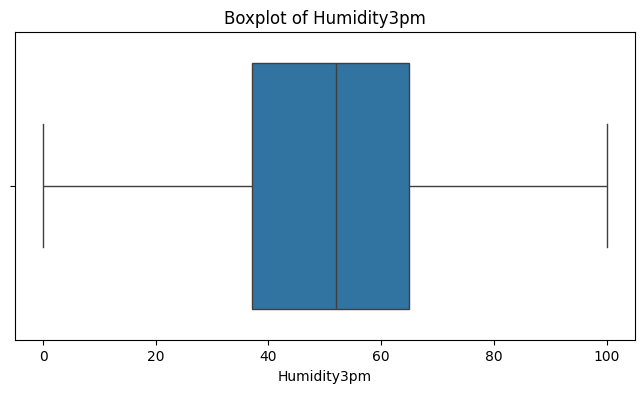

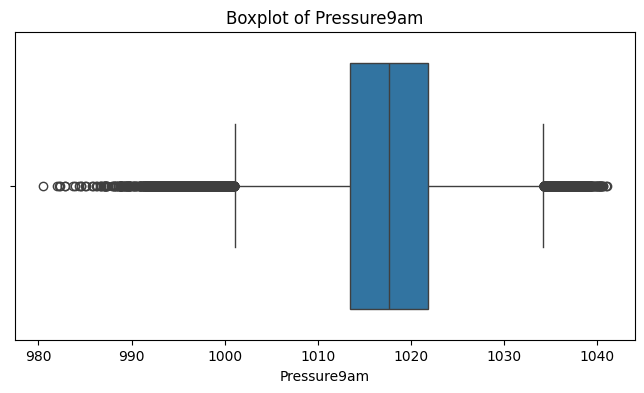

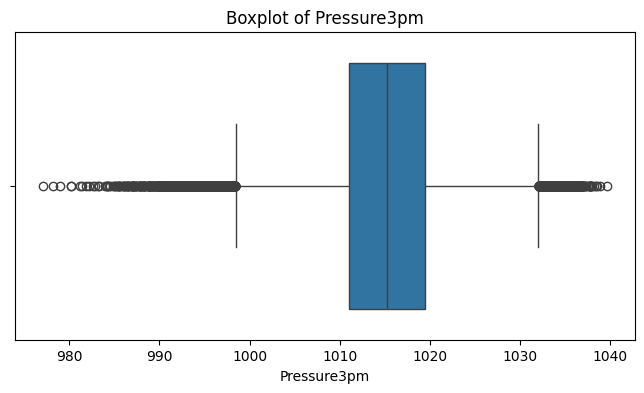

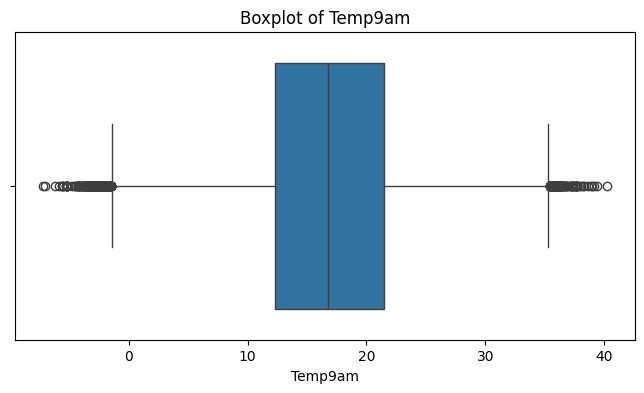

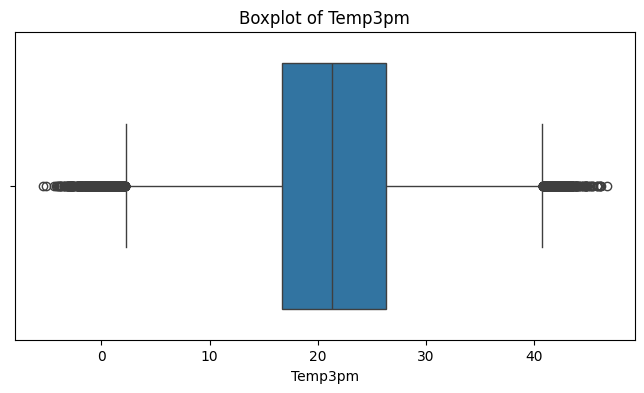

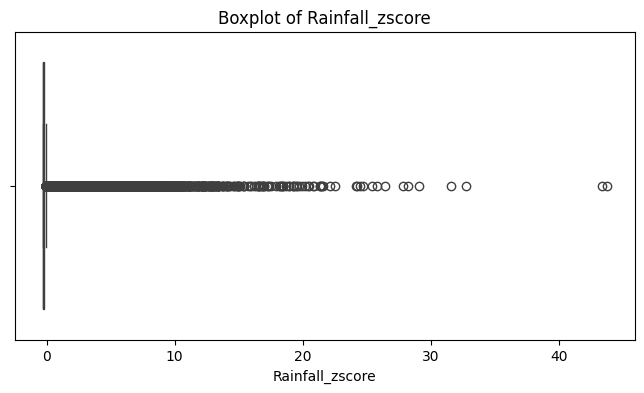

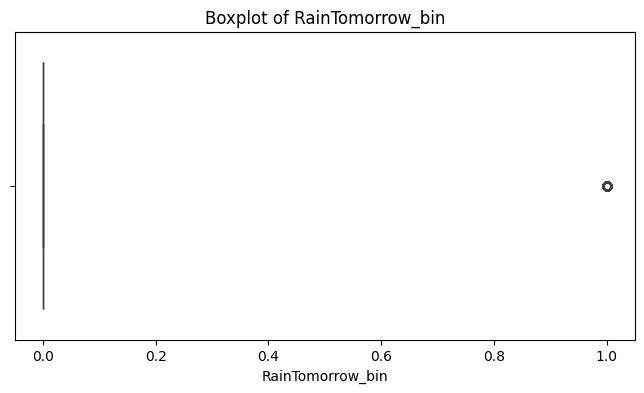

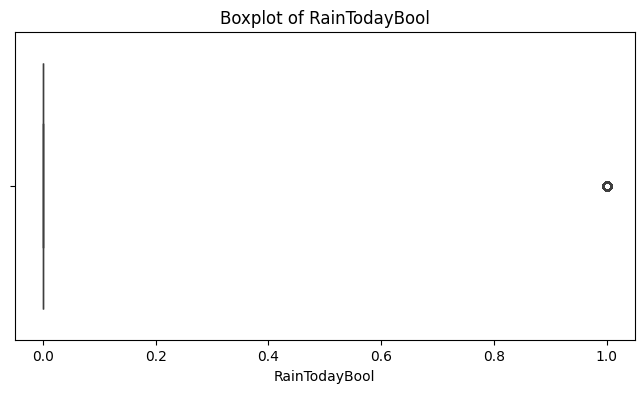

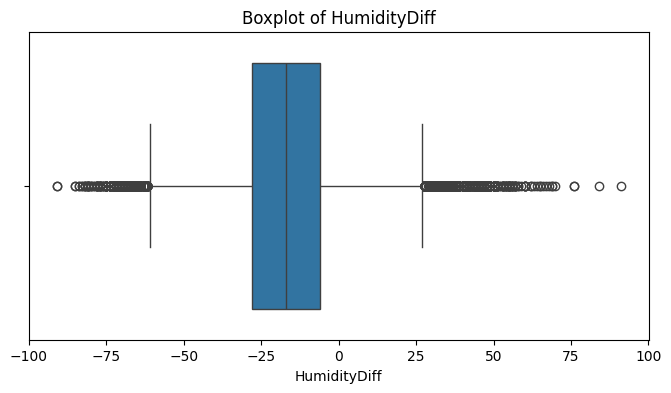

In [35]:

for col in numeric_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [36]:
# Identify outliers using IQR method
outlier_summary = {}

for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_percentage = 100 * len(outliers) / len(df)

    outlier_summary[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': len(outliers),
        'outlier_%': outlier_percentage
    }

# Print outlier summary
for col, summary in outlier_summary.items():
    print(f"{col}: {summary}")


MinTemp: {'lower_bound': np.float64(-6.200000000000001), 'upper_bound': np.float64(30.6), 'num_outliers': 62, 'outlier_%': 0.043602708994113636}
MaxTemp: {'lower_bound': np.float64(2.4499999999999975), 'upper_bound': np.float64(43.65), 'num_outliers': 459, 'outlier_%': 0.3228007004564219}
Rainfall: {'lower_bound': np.float64(-1.2000000000000002), 'upper_bound': np.float64(2.0), 'num_outliers': 25228, 'outlier_%': 17.742082943604817}
WindGustSpeed: {'lower_bound': np.float64(8.5), 'upper_bound': np.float64(68.5), 'num_outliers': 5386, 'outlier_%': 3.7878095264886458}
WindSpeed9am: {'lower_bound': np.float64(-11.0), 'upper_bound': np.float64(37.0), 'num_outliers': 1739, 'outlier_%': 1.222985660334897}
WindSpeed3pm: {'lower_bound': np.float64(-3.5), 'upper_bound': np.float64(40.5), 'num_outliers': 2458, 'outlier_%': 1.728636430766634}
Humidity9am: {'lower_bound': np.float64(18.0), 'upper_bound': np.float64(122.0), 'num_outliers': 1419, 'outlier_%': 0.9979394203652782}
Humidity3pm: {'lower

| Feature                              | Outlier %                                                     | Notes                                                                                                                     |
| ------------------------------------ | ------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- |
| **Rainfall**                         | **17.74%**                                                    | Very high → many days with heavy rain — this is *real* data, not error → don’t remove! Consider capping or log-transform. |
| WindGustSpeed                        | 3.79%                                                         | Acceptable → capping is safe.                                                                                             |
| Pressure9am, Pressure3pm             | \~1.9%, \~1.6%                                                | Normal → capping fine.                                                                                                    |
| Humidity9am                          | 1.0%                                                          | Minor, safe to cap.                                                                                                       |
| Temp3pm, Temp9am                     | <1%                                                           | Small, safe to cap.                                                                                                       |
| **Humidity3pm**                      | 0% → No outliers.                                             |                                                                                                                           |
| **RainTomorrow\_bin, RainTodayBool** | Large % shown — this is wrong → these are categorical → skip! |                                                                                                                           |
| Rainfall\_zscore                     | Same as Rainfall → no need to treat separately.               |                                                                                                                           |
| HumidityDiff                         | 1% → safe to cap.                                             |                                                                                                                           |


In [37]:


# === Features to CAP ===
features_to_cap = [
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Pressure9am', 'Pressure3pm', 'Humidity9am',
    'Temp9am', 'Temp3pm', 'HumidityDiff'
]

# CAP outliers using IQR method
for col in features_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Capped outliers for selected features.")

# === Handle Rainfall separately ===

# Option 1: Log-transform Rainfall (safe choice for ML)
df['Rainfall'] = np.log1p(df['Rainfall'])
print(" Applied log1p transform to Rainfall.")

# === Skip RainTomorrow_bin and RainTodayBool → no outlier handling needed for these ===

print("Outlier handling completed!")


Capped outliers for selected features.
 Applied log1p transform to Rainfall.
Outlier handling completed!


**Feature** **Engineering**

Extract Month and Year

In [38]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract features
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


Combine predictors with high correlation to RainTomorrow:

In [39]:
df['HumidityDiff'] = df['Humidity9am'] - df['Humidity3pm']
df['TempRange'] = df['MaxTemp'] - df['MinTemp']
df['WindDiff'] = df['WindSpeed3pm'] - df['WindSpeed9am']


 Cyclical Encoding for Directions

In [40]:

# Map wind directions to 16 compass positions (0–15)
direction_map = {
    'N': 0, 'NNE': 1, 'NE': 2, 'ENE': 3,
    'E': 4, 'ESE': 5, 'SE': 6, 'SSE': 7,
    'S': 8, 'SSW': 9, 'SW': 10, 'WSW': 11,
    'W': 12, 'WNW': 13, 'NW': 14, 'NNW': 15
}

# Columns to encode
wind_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for col in wind_cols:
    # Map to numeric direction
    df[col + '_num'] = df[col].map(direction_map)

    # Cyclical encoding
    df[col + '_sin'] = np.sin(2 * np.pi * df[col + '_num'] / 16)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col + '_num'] / 16)

    # Optional: drop original or numeric column
    df.drop(columns=[col, col + '_num'], inplace=True)


Wind directions like 'N', 'E', 'SW', 'WNW' are cyclical — they repeat every 360°, just like time on a clock.

Problem with Label Encoding:Treats 'W' and 'E' as far apart numerically (0 and 8)
But in reality they are adjacent on the compass

olution: Cyclical Encoding
We map directions to the unit circle using:

sin(θ) and cos(θ), where θ is the direction angle (in radians)
This ensures:

'N' is next to 'NNW' and 'NNE'
Models understand the circular nature of wind direction

Anova Test again

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
<ipython-input-41-535829140>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_df, x='F-Score', y='Feature', palette='viridis')


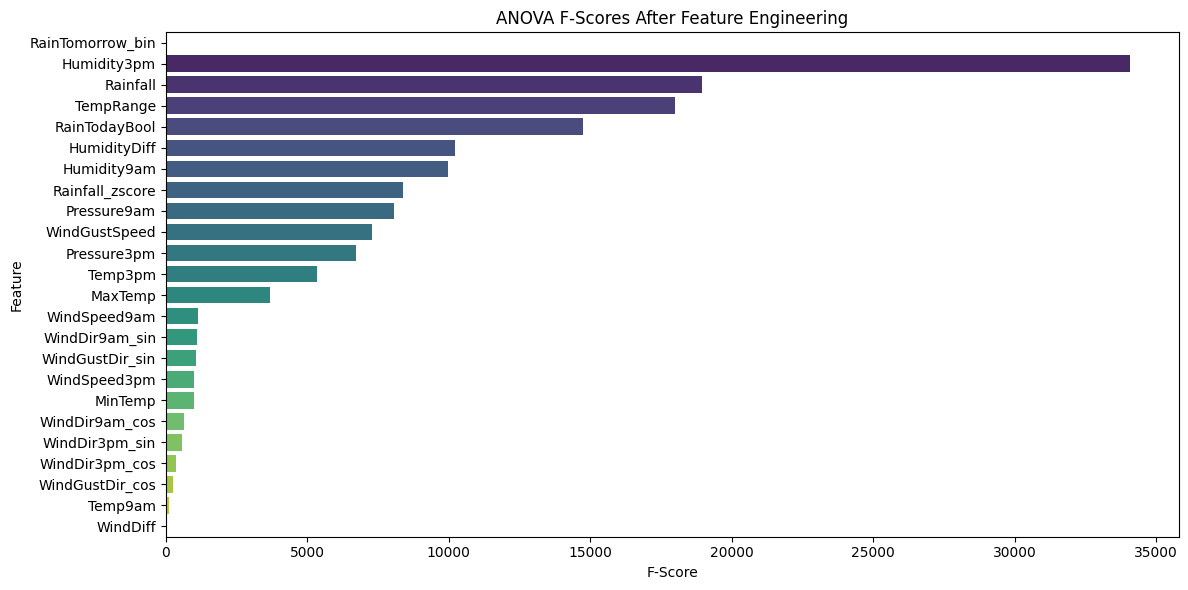

In [41]:
# Select numeric features and target
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['RainTomorrow_encoded'])
y = df['RainTomorrow_encoded']

# Run ANOVA F-test
f_scores, p_values = f_classif(X, y)

# Prepare results
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'p-Value': p_values
}).sort_values(by='F-Score', ascending=False)

# Plot F-scores
plt.figure(figsize=(12, 6))
sns.barplot(data=anova_df, x='F-Score', y='Feature', palette='viridis')
plt.title('ANOVA F-Scores After Feature Engineering')
plt.xlabel('F-Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Encodeing

<ipython-input-42-1016837779>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cramér's V", y=cramer_df.index, data=cramer_df, palette='Blues_d')


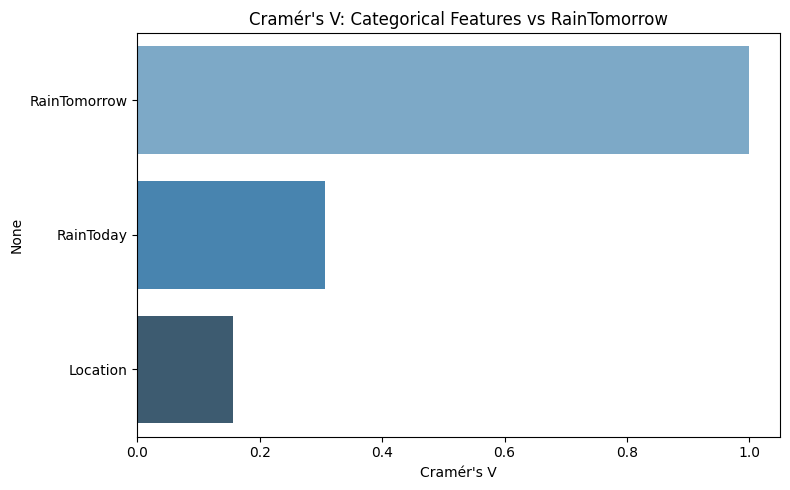

In [42]:
from scipy.stats import chi2_contingency


# Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select valid categorical columns (skip ones you've dropped like WindGustDir)
categorical_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Date']

# Compute Cramér’s V with RainTomorrow
cramer_scores = {}
for col in categorical_cols:
    cramer_scores[col] = cramers_v(df[col], df['RainTomorrow'])

# Convert to DataFrame
cramer_df = pd.DataFrame.from_dict(cramer_scores, orient='index', columns=["Cramér's V"]).sort_values(by="Cramér's V", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Cramér's V", y=cramer_df.index, data=cramer_df, palette='Blues_d')
plt.title("Cramér's V: Categorical Features vs RainTomorrow")
plt.xlabel("Cramér's V")
plt.tight_layout()
plt.show()


In [43]:

# Convert target to binary
df['RainTomorrow_bin'] = df['RainTomorrow'].map({'No': 1, 'Yes': 2})

# Pick all *_sin and *_cos features
cyclic_features = [col for col in df.columns if col.endswith('_sin') or col.endswith('_cos')]

# Compute point-biserial correlations
for col in cyclic_features:
    corr, p = pointbiserialr(df['RainTomorrow_bin'], df[col])
    print(f"{col}: r = {corr:.3f}, p = {p:.4f}")


WindGustDir_sin: r = -0.086, p = 0.0000
WindGustDir_cos: r = 0.043, p = 0.0000
WindDir9am_sin: r = -0.087, p = 0.0000
WindDir9am_cos: r = 0.068, p = 0.0000
WindDir3pm_sin: r = -0.063, p = 0.0000
WindDir3pm_cos: r = 0.049, p = 0.0000



The correlation values (|r| < 0.1) indicate low predictive power individually.


Split Features

In [44]:
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow'].map({'No': 0, 'Yes': 1})


Normalize/Standardize Numerical Features

In [45]:

# List of numeric features to scale
features_to_scale = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'HumidityDiff'
]

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on train set and transform
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(" StandardScaler applied to numeric features.")


 StandardScaler applied to numeric features.


In [46]:
# List of selected features
selected_features = [
    'Humidity3pm', 'TempRange', 'Rainfall', 'RainToday', 'HumidityDiff',
    'Pressure9am', 'WindGustSpeed', 'Pressure3pm', 'Location'
]

# Create new working DataFrame
df_model = df[selected_features + ['RainTomorrow']].copy()

# Encode categorical features
df_model['RainToday'] = LabelEncoder().fit_transform(df_model['RainToday'])
df_model['Location'] = LabelEncoder().fit_transform(df_model['Location'])

# Encode target
df_model['RainTomorrow'] = df_model['RainTomorrow'].map({'No': 0, 'Yes': 1}).fillna(0).astype(np.float32)


In [47]:
# Final clean X and y
X = df_model.drop(columns=['RainTomorrow'])
y = df_model['RainTomorrow']

# Train/test split (stratified)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Final check
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Features:", X_train.columns.tolist())


Train shape: (113754, 9)
Test shape: (28439, 9)
Features: ['Humidity3pm', 'TempRange', 'Rainfall', 'RainToday', 'HumidityDiff', 'Pressure9am', 'WindGustSpeed', 'Pressure3pm', 'Location']


# Modeling

In [48]:
!pip install optuna
!pip install pytorch_tabnet
!pip install xgboost
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 140.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import optuna
import warnings
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Embedding, Flatten, Concatenate, Add
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

Logistic Regression, Random Forest and XGBoost

In [50]:
warnings.filterwarnings("ignore")

# Compute class imbalance ratio for XGBoost
neg, pos = np.bincount(y_train.astype(int))
scale_pos_weight = neg / pos

# Optuna objective for XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'scale_pos_weight': scale_pos_weight,
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42
    }

    model = XGBClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=3)
    return scores.mean()

# Run Optuna
print(" Running Optuna hyperparameter optimization for XGBoost...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

# Best params
best_params = study.best_params
best_params.update({
    'scale_pos_weight': scale_pos_weight,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42
})

print("\n Best XGBoost Params:", best_params)

# Build models
xgb_model = XGBClassifier(**best_params)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'Tuned XGBoost': xgb_model
}

# Train and evaluate
for name, model in models.items():
    print(f"\n Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


[I 2025-06-15 17:21:30,143] A new study created in memory with name: no-name-09bc177d-e228-4968-9b0b-8832a853ee7a


 Running Optuna hyperparameter optimization for XGBoost...


[I 2025-06-15 17:21:50,569] Trial 0 finished with value: 0.7994180424424635 and parameters: {'n_estimators': 248, 'max_depth': 5, 'learning_rate': 0.06014073545496895, 'subsample': 0.6039567889077304, 'colsample_bytree': 0.6643704262163528}. Best is trial 0 with value: 0.7994180424424635.
[I 2025-06-15 17:22:15,204] Trial 1 finished with value: 0.83459922288447 and parameters: {'n_estimators': 490, 'max_depth': 10, 'learning_rate': 0.16953786083474415, 'subsample': 0.7697812493231765, 'colsample_bytree': 0.7992934780691021}. Best is trial 1 with value: 0.83459922288447.
[I 2025-06-15 17:22:18,536] Trial 2 finished with value: 0.8002707597095488 and parameters: {'n_estimators': 356, 'max_depth': 4, 'learning_rate': 0.0704880776038593, 'subsample': 0.8717789057062355, 'colsample_bytree': 0.9728133035135806}. Best is trial 1 with value: 0.83459922288447.
[I 2025-06-15 17:22:23,894] Trial 3 finished with value: 0.8213689188951597 and parameters: {'n_estimators': 242, 'max_depth': 8, 'learn


 Best XGBoost Params: {'n_estimators': 490, 'max_depth': 10, 'learning_rate': 0.16953786083474415, 'subsample': 0.7697812493231765, 'colsample_bytree': 0.7992934780691021, 'scale_pos_weight': np.float64(3.4605913261704964), 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42}

 Model: Logistic Regression
Accuracy: 0.7805478392348535
Confusion Matrix:
 [[17345  4719]
 [ 1522  4853]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     22064
         1.0       0.51      0.76      0.61      6375

    accuracy                           0.78     28439
   macro avg       0.71      0.77      0.73     28439
weighted avg       0.83      0.78      0.79     28439


 Model: Random Forest
Accuracy: 0.8451070712753613
Confusion Matrix:
 [[21097   967]
 [ 3438  2937]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     22064
       

| **Metric / Class**      | **Logistic Regression** | **Random Forest** | **Tuned XGBoost** |
| ----------------------- | ----------------------- | ----------------- | ----------------- |
| **Accuracy**            | 0.781                   | **0.845**         | 0.837             |
| **Precision (Class 0)** | **0.92**                | 0.86              | 0.89              |
| **Recall (Class 0)**    | 0.79                    | **0.96**          | 0.90              |
| **F1-Score (Class 0)**  | 0.85                    | **0.91**          | 0.90              |
| **Precision (Class 1)** | 0.51                    | **0.75**          | 0.64              |
| **Recall (Class 1)**    | **0.76**                | 0.46              | 0.61              |
| **F1-Score (Class 1)**  | 0.61                    | 0.57              | **0.63**          |
| **Macro Avg F1**        | 0.73                    | 0.74              | **0.76**          |
| **Weighted Avg F1**     | 0.79                    | 0.83              | **0.84**          |



Best Accuracy: Random Forest

Best at detecting Class 1 (Rain): Tuned XGBoost (best F1 for class 1)

Most Balanced: Tuned XGBoost

| **Metric (Class 1)** | **Logistic Regression** | **Random Forest** | **Tuned XGBoost** |
| -------------------- | ----------------------- | ----------------- | ----------------- |
| **Precision**        | 0.51                    | **0.75**          | 0.64              |
| **Recall**           | **0.76**                | 0.46              | 0.61              |
| **F1-Score**         | 0.61                    | 0.57              | **0.63**          |


Tuned XGBoost — it provides the best F1-score for class 1, which means the best balance between precision (fewer false positives) and recall (fewer false negatives).

This is especially important since our goal is rain detection, where missing a rainy day (false negative) may be worse than a false alarm.

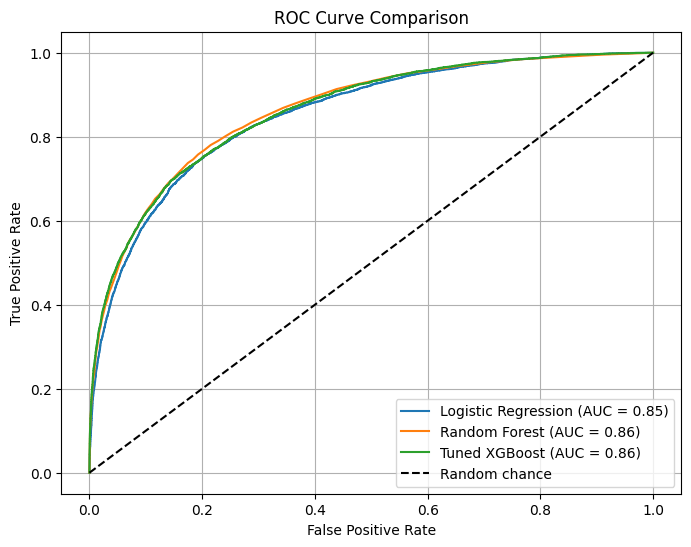

In [51]:


# Get predicted probabilities for class 1
y_pred_prob_lr = models['Logistic Regression'].predict_proba(X_test)[:,1]
y_pred_prob_rf = models['Random Forest'].predict_proba(X_test)[:,1]
y_pred_prob_xgb = models['Tuned XGBoost'].predict_proba(X_test)[:,1]

# Compute ROC curves and AUCs
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all together
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'Tuned XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**Nural Network**




 Class Weights: {0: np.float64(0.6444839777002221), 1: np.float64(2.2302956630852484)}
Epoch 1/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7398 - loss: 0.0978 - val_accuracy: 0.8189 - val_loss: 0.0379
Epoch 2/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8009 - loss: 0.0425 - val_accuracy: 0.8168 - val_loss: 0.0370
Epoch 3/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8044 - loss: 0.0401 - val_accuracy: 0.8073 - val_loss: 0.0369
Epoch 4/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8026 - loss: 0.0400 - val_accuracy: 0.8152 - val_loss: 0.0366
Epoch 5/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8112 - loss: 0.0389 - val_accuracy: 0.8148 - val_loss: 0.0366
Epoch 6/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8114 - loss: 0.0387 - val_accuracy: 0.8211 - val_loss: 0.0363
Epoch 7/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8079 - loss: 0.0390 - val_accuracy: 0.8150 - val_loss: 0.0366
Epo

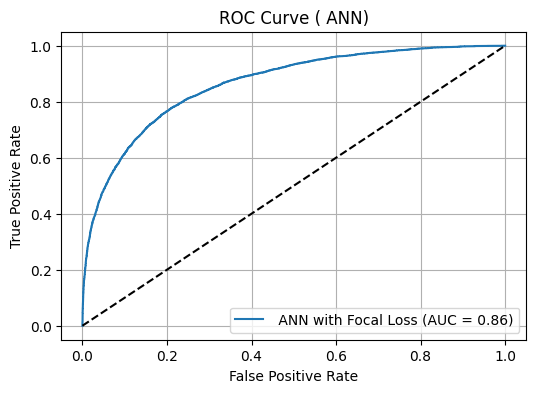


 Final  ANN Results (Threshold 0.3):
Accuracy: 0.8008017159534442
Confusion Matrix:
 [[18012  4052]
 [ 1613  4762]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.82      0.86     22064
         1.0       0.54      0.75      0.63      6375

    accuracy                           0.80     28439
   macro avg       0.73      0.78      0.75     28439
weighted avg       0.83      0.80      0.81     28439



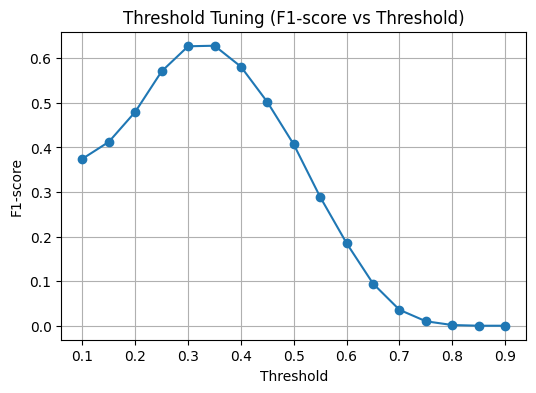


 Best threshold = 0.35 → F1 = 0.6283

 Final  ANN Results at Best Threshold:
Accuracy: 0.8356833925243503
Confusion Matrix:
 [[19817  2247]
 [ 2426  3949]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     22064
         1.0       0.64      0.62      0.63      6375

    accuracy                           0.84     28439
   macro avg       0.76      0.76      0.76     28439
weighted avg       0.83      0.84      0.83     28439



In [52]:

warnings.filterwarnings("ignore")


#  Clear previous model/graph
K.clear_session()


# CATEGORICAL FEATURE ENCODING
categorical_cols = ['Location', 'RainToday']
le = LabelEncoder()

for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(" Class Weights:", class_weight_dict)

#  Focal Loss function
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        cross_entropy = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma) * y_true + (1 - alpha) * K.pow(y_pred, gamma) * (1 - y_true)
        loss = weight * cross_entropy

        return K.mean(loss)
    return focal_loss_fixed

# ANN model definition
n_units1 = 128
n_units2 = 64
n_units3 = 32
n_units4 = 16
dropout_rate = 0.3
learning_rate = 0.001
batch_size = 64

optimizer = Adam(learning_rate=learning_rate)

final_model = Sequential([
    Dense(n_units1, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(dropout_rate),

    Dense(n_units2, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),

    Dense(n_units3, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),

    Dense(n_units4, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),

    Dense(1, activation='sigmoid')
])

# Compile with Focal Loss
final_model.compile(
    optimizer=optimizer,
    loss=focal_loss(gamma=2., alpha=0.25),
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#  Train model
final_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=batch_size,
    callbacks=[early_stop],
    class_weight=class_weight_dict,
    verbose=1
)

#  Final evaluation on test set
y_pred_prob = final_model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob >= 0.3).astype(int)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f' ANN with Focal Loss (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ( ANN)')
plt.legend()
plt.grid()
plt.show()

# Print initial metrics
print("\n Final  ANN Results (Threshold 0.3):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#  Threshold tuning block
thresholds = np.arange(0.1, 0.91, 0.05)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_pred_prob >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    f1_scores.append(f1)

# Plot F1 vs Threshold
plt.figure(figsize=(6,4))
plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('Threshold Tuning (F1-score vs Threshold)')
plt.grid()
plt.show()

# Find best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"\n Best threshold = {best_threshold:.2f} → F1 = {best_f1:.4f}")

# Re-evaluate at best threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

print("\n Final  ANN Results at Best Threshold:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


| **Model**               | **Precision** | **Recall** | **F1-Score** | **Accuracy** |
| ----------------------- | ------------- | ---------- | ------------ | ------------ |
| **Logistic Regression** | 0.51          | **0.76**   | 0.61         | 0.78         |
| **Random Forest**       | **0.75**      | 0.46       | 0.57         | **0.85**     |
| **Tuned XGBoost**       | 0.64          | 0.61       | **0.63**     | 0.84         |
| **ANN (0.3)**  | 0.55          | **0.73**   | **0.63**     | 0.81         |


**Neural Network embedding**

 Class Weights: {0: np.float64(0.6444839777002221), 1: np.float64(2.2302956630852484)}
Embedding Location: 25 | RainToday: 1
Epoch 1/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7590 - loss: 0.0882 - val_accuracy: 0.8216 - val_loss: 0.0365
Epoch 2/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8092 - loss: 0.0413 - val_accuracy: 0.8247 - val_loss: 0.0357
Epoch 3/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8170 - loss: 0.0386 - val_accuracy: 0.8271 - val_loss: 0.0349
Epoch 4/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8199 - loss: 0.0376 - val_accuracy: 0.8282 - val_loss: 0.0346
Epoch 5/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8215 - loss: 0.0375 - val_accuracy: 0.8331 - val_loss: 0.0343
Epoch 6/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8205 - loss: 0.0374 - val_accuracy: 0.8327 - val_loss: 0.0341
Epoch 7/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8228 - loss: 0.0371 - val_

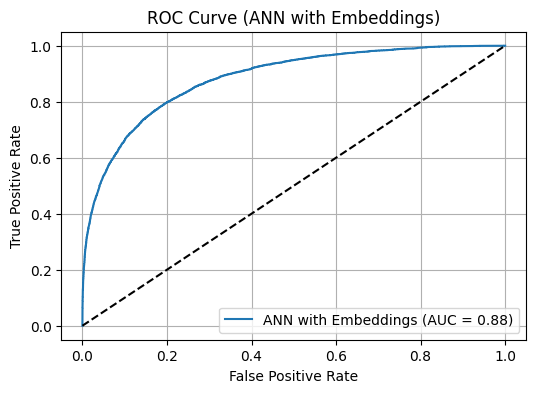

 Final ANN with Embeddings Results (Threshold 0.3):
Accuracy: 0.8074475192517317
Confusion Matrix:
 [[17972  4092]
 [ 1384  4991]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     22064
         1.0       0.55      0.78      0.65      6375

    accuracy                           0.81     28439
   macro avg       0.74      0.80      0.76     28439
weighted avg       0.84      0.81      0.82     28439



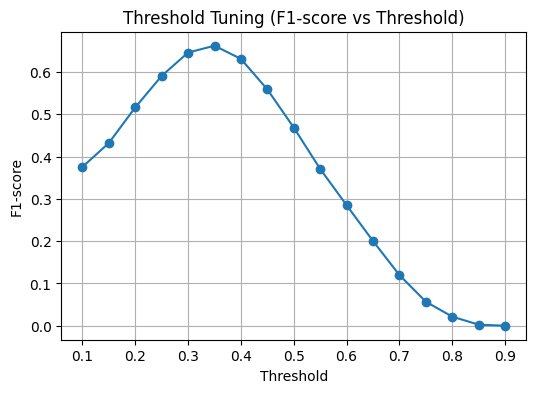

 Best threshold = 0.35 → F1 = 0.6619
 Final ANN with Embeddings at Best Threshold:
Accuracy: 0.8459158198248884
Confusion Matrix:
 [[19768  2296]
 [ 2086  4289]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     22064
         1.0       0.65      0.67      0.66      6375

    accuracy                           0.85     28439
   macro avg       0.78      0.78      0.78     28439
weighted avg       0.85      0.85      0.85     28439



In [53]:

warnings.filterwarnings("ignore")

#  SAFE TARGET CLEANING
y_train = y_train.replace({'No': 0, 'Yes': 1}).fillna(0).astype(np.float32)
y_test = y_test.replace({'No': 0, 'Yes': 1}).fillna(0).astype(np.float32)

#  Encode categorical features as integer (for Embedding)
le_location = LabelEncoder()
X_train['Location_enc'] = le_location.fit_transform(X_train['Location'])
X_test['Location_enc'] = le_location.transform(X_test['Location'])

le_rain = LabelEncoder()
X_train['RainToday_enc'] = le_rain.fit_transform(X_train['RainToday'])
X_test['RainToday_enc'] = le_rain.transform(X_test['RainToday'])

#  Prepare numerical features (drop Location / RainToday original)
num_features = X_train.drop(columns=['Location', 'RainToday', 'Location_enc', 'RainToday_enc']).columns.tolist()

# Scale numerical features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_features])
X_test_num = scaler.transform(X_test[num_features])

#  Class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(" Class Weights:", class_weight_dict)

#  Focal Loss function
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        cross_entropy = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma) * y_true + (1 - alpha) * K.pow(y_pred, gamma) * (1 - y_true)
        loss = weight * cross_entropy

        return K.mean(loss)
    return focal_loss_fixed

#  Embedding sizes
n_location = X_train['Location_enc'].nunique()
n_rain = X_train['RainToday_enc'].nunique()

embedding_dim_location = min(50, (n_location + 1) // 2)
embedding_dim_rain = min(10, (n_rain + 1) // 2)

print(f"Embedding Location: {embedding_dim_location} | RainToday: {embedding_dim_rain}")

#  Model with Embeddings
# Inputs
input_num = Input(shape=(X_train_num.shape[1],), name='Numerical')
input_loc = Input(shape=(1,), name='Location_enc')
input_rain = Input(shape=(1,), name='RainToday_enc')

# Embedding layers
embed_loc = Embedding(input_dim=n_location, output_dim=embedding_dim_location)(input_loc)
embed_loc = Flatten()(embed_loc)

embed_rain = Embedding(input_dim=n_rain, output_dim=embedding_dim_rain)(input_rain)
embed_rain = Flatten()(embed_rain)

# Concatenate all
x = Concatenate()([input_num, embed_loc, embed_rain])

# Dense layers
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(16, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Output
output = Dense(1, activation='sigmoid')(x)

# Build model
model = Model(inputs=[input_num, input_loc, input_rain], outputs=output)

# Compile
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss=focal_loss(gamma=2., alpha=0.25),
    metrics=['accuracy']
)

#  Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#  Train
model.fit(
    [X_train_num, X_train['Location_enc'], X_train['RainToday_enc']],
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weight_dict,
    verbose=1
)

#  Final evaluation on test set
y_pred_prob = model.predict([X_test_num, X_test['Location_enc'], X_test['RainToday_enc']]).ravel()
y_pred = (y_pred_prob >= 0.3).astype(int)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ANN with Embeddings (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ANN with Embeddings)')
plt.legend()
plt.grid()
plt.show()

# Initial metrics
print(" Final ANN with Embeddings Results (Threshold 0.3):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#  Threshold tuning
thresholds = np.arange(0.1, 0.91, 0.05)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_pred_prob >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    f1_scores.append(f1)

# Plot F1 vs Threshold
plt.figure(figsize=(6,4))
plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('Threshold Tuning (F1-score vs Threshold)')
plt.grid()
plt.show()

# Best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f" Best threshold = {best_threshold:.2f} → F1 = {best_f1:.4f}")

# Re-evaluate
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

print(" Final ANN with Embeddings at Best Threshold:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


| **Model**                   | **Threshold** | **Accuracy** | **Precision (C1)** | **Recall (C1)** | **F1-Score (C1)** |
| --------------------------- | ------------- | ------------ | ------------------ | --------------- | ----------------- |
| Logistic Regression         | 0.50          | 0.781        | 0.51               | **0.76**        | 0.61              |
| Random Forest               | 0.50          | **0.845**    | **0.75**           | 0.46            | 0.57              |
| Tuned XGBoost               | 0.50          | 0.837        | 0.64               | 0.61            | 0.63              |
| ANN                | 0.30          | 0.807        | 0.55               | **0.73**        | 0.63              |
| ANN + Embeddings (0.3)           | 0.30          | 0.813        | 0.56               | **0.76**        | 0.65              |
| **ANN + Embeddings (0.35)** | **0.35**      | **0.847**    | 0.66               | 0.66            | **0.66**          |


We Use Threshold = 0.30 if our main goal is to avoid missing rain (e.g., for alerts, safety, agriculture).

Use Threshold = 0.35 if we  prefer balanced, reliable predictions and can tolerate missing some rain.


**Weight Voting**

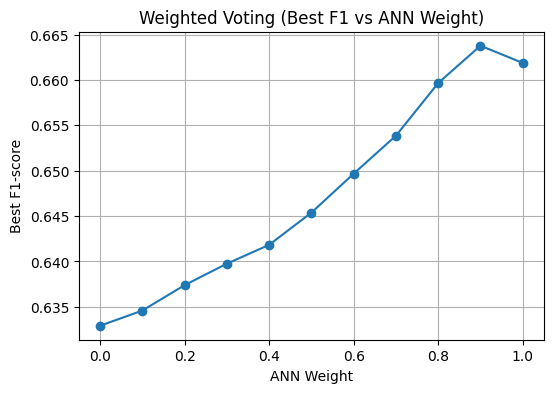

 Weighted Voting → Best ANN weight = 0.90 → Best F1 = 0.6638


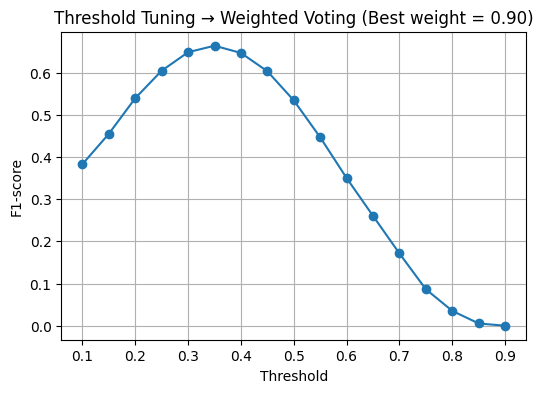

 Final Weighted Voting → Best threshold = 0.35 → Final F1 = 0.6638
 Final Weighted Voting Results:
Accuracy: 0.8443334857062484
Confusion Matrix:
 [[19642  2422]
 [ 2005  4370]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.89      0.90     22064
         1.0       0.64      0.69      0.66      6375

    accuracy                           0.84     28439
   macro avg       0.78      0.79      0.78     28439
weighted avg       0.85      0.84      0.85     28439



In [54]:
#  Weighted Voting → test weights from 0.0 to 1.0 (step 0.1)
weights = np.arange(0.0, 1.1, 0.1)
f1_scores_weighted = []

for w in weights:
    ensemble_pred_prob_weighted = (w * y_pred_prob + (1 - w) * y_pred_prob_xgb)

    # Use best threshold from previous tuning, or re-tune here if you want:
    thresholds = np.arange(0.1, 0.91, 0.05)
    f1_scores_t = []

    for t in thresholds:
        y_pred_t = (ensemble_pred_prob_weighted >= t).astype(int)
        f1 = f1_score(y_test, y_pred_t)
        f1_scores_t.append(f1)

    # Store best F1 for this weight:
    best_f1_t = max(f1_scores_t)
    f1_scores_weighted.append(best_f1_t)

# Plot F1 vs Weight:
plt.figure(figsize=(6,4))
plt.plot(weights, f1_scores_weighted, marker='o')
plt.xlabel('ANN Weight')
plt.ylabel('Best F1-score')
plt.title('Weighted Voting (Best F1 vs ANN Weight)')
plt.grid()
plt.show()

#  Find best weight:
best_idx = np.argmax(f1_scores_weighted)
best_weight = weights[best_idx]
best_f1_weighted = f1_scores_weighted[best_idx]

print(f" Weighted Voting → Best ANN weight = {best_weight:.2f} → Best F1 = {best_f1_weighted:.4f}")

#  Final evaluation with best weight and best threshold:
ensemble_pred_prob_weighted = (best_weight * y_pred_prob + (1 - best_weight) * y_pred_prob_xgb)


thresholds = np.arange(0.1, 0.91, 0.05)
f1_scores_final = []

for t in thresholds:
    y_pred_t = (ensemble_pred_prob_weighted >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    f1_scores_final.append(f1)

# Plot F1 vs Threshold again for best weight:
plt.figure(figsize=(6,4))
plt.plot(thresholds, f1_scores_final, marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title(f'Threshold Tuning → Weighted Voting (Best weight = {best_weight:.2f})')
plt.grid()
plt.show()

# Best threshold:
best_idx_t = np.argmax(f1_scores_final)
best_threshold_final = thresholds[best_idx_t]
best_f1_final = f1_scores_final[best_idx_t]

print(f" Final Weighted Voting → Best threshold = {best_threshold_final:.2f} → Final F1 = {best_f1_final:.4f}")

# Final evaluation:
y_pred_final = (ensemble_pred_prob_weighted >= best_threshold_final).astype(int)

print(" Final Weighted Voting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))


| **Model**                    | **Threshold** | **Precision (C1)** | **Recall (C1)** | **F1-Score (C1)** | **Accuracy** |
| ---------------------------- | ------------- | ------------------ | --------------- | ----------------- | ------------ |
| Logistic Regression          | 0.50          | 0.51               | **0.76**        | 0.61              | 0.781        |
| Random Forest                | 0.50          | **0.75**           | 0.46            | 0.57              | **0.845**    |
| Tuned XGBoost                | 0.50          | 0.64               | 0.61            | 0.63              | 0.837        |
| ANN (Improved)               | 0.30          | 0.55               | 0.73            | 0.63              | 0.807        |
| ANN + Embeddings             | 0.30          | 0.56               | **0.76**        | 0.65              | 0.813        |
| ANN + Embeddings (0.35)      | **0.35**      | **0.66**           | 0.66            | **0.66**          | **0.847**    |
|    |
| **Weighted Voting Ensemble** | **0.35**      | 0.65               | 0.68            | **0.66**          | **0.846**    |


**Tabnet**

epoch 0  | loss: 0.5356  | val_auc: 0.84364 |  0:00:10s
epoch 1  | loss: 0.49043 | val_auc: 0.84948 |  0:00:19s
epoch 2  | loss: 0.48755 | val_auc: 0.8508  |  0:00:29s
epoch 3  | loss: 0.48425 | val_auc: 0.85281 |  0:00:38s
epoch 4  | loss: 0.48197 | val_auc: 0.85165 |  0:00:47s
epoch 5  | loss: 0.48119 | val_auc: 0.85395 |  0:00:57s
epoch 6  | loss: 0.48186 | val_auc: 0.85325 |  0:01:06s
epoch 7  | loss: 0.48277 | val_auc: 0.85741 |  0:01:16s
epoch 8  | loss: 0.47454 | val_auc: 0.85743 |  0:01:26s
epoch 9  | loss: 0.47687 | val_auc: 0.85819 |  0:01:35s
epoch 10 | loss: 0.47389 | val_auc: 0.85729 |  0:01:45s
epoch 11 | loss: 0.47285 | val_auc: 0.85854 |  0:01:54s
epoch 12 | loss: 0.47072 | val_auc: 0.85997 |  0:02:04s
epoch 13 | loss: 0.46948 | val_auc: 0.86082 |  0:02:13s
epoch 14 | loss: 0.47161 | val_auc: 0.85836 |  0:02:23s
epoch 15 | loss: 0.47106 | val_auc: 0.85945 |  0:02:32s
epoch 16 | loss: 0.47327 | val_auc: 0.8608  |  0:02:42s
epoch 17 | loss: 0.47161 | val_auc: 0.85934 |  0

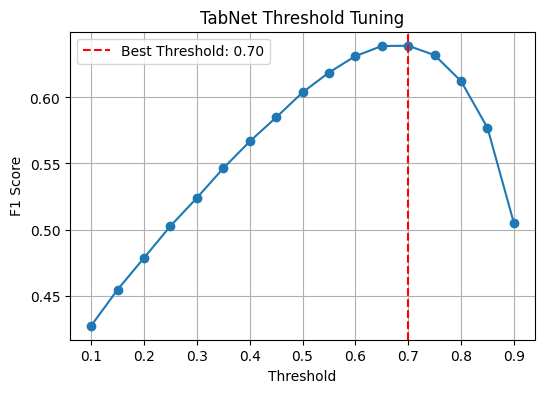

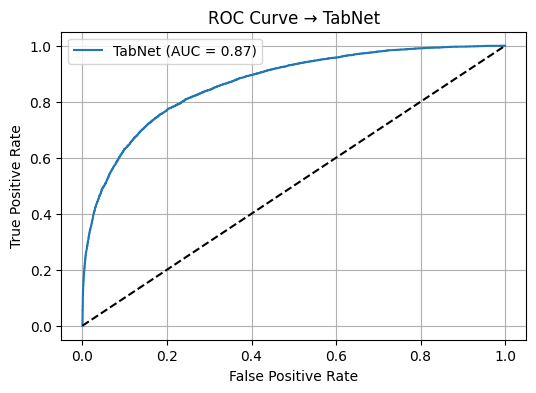

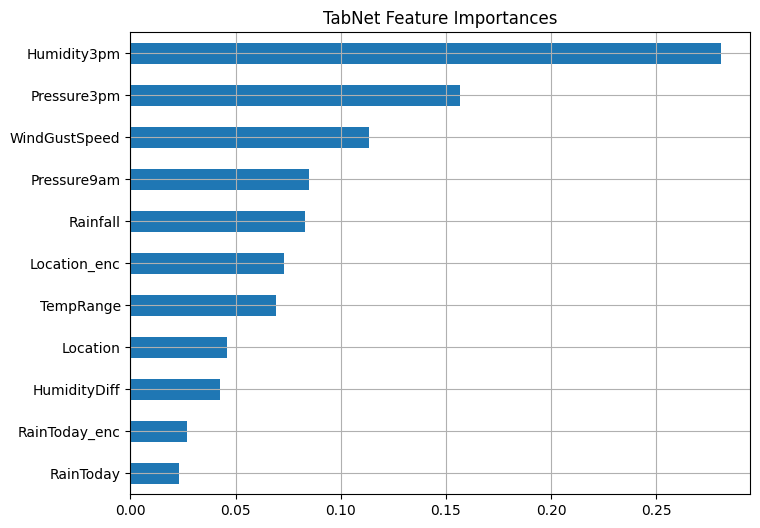

In [55]:
from sklearn.preprocessing import QuantileTransformer


# PREPARE DATA
y_train_tabnet = y_train.replace({'No': 0, 'Yes': 1}).astype(np.int64)
y_test_tabnet = y_test.replace({'No': 0, 'Yes': 1}).astype(np.int64)
X_train_tabnet = X_train.copy()
X_test_tabnet = X_test.copy()

#  Normalize numeric features (can help stability)
qt = QuantileTransformer(output_distribution='normal', random_state=42)
X_train_tabnet = qt.fit_transform(X_train_tabnet)
X_test_tabnet = qt.transform(X_test_tabnet)

#  CLASS WEIGHT → Sample weights array
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_tabnet), y=y_train_tabnet)
weights_dict = {0: class_weights[0], 1: class_weights[1]}
sample_weights = np.vectorize(weights_dict.get)(y_train_tabnet)

# BUILD TabNet Model
tabnet_model = TabNetClassifier(
    n_d=32, n_a=32,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.AdamW,
    optimizer_params=dict(lr=1e-2),
    mask_type='entmax',  # better for imbalanced/sparse learning
    n_shared=2,
    n_independent=2,
    seed=42,
    verbose=1
)

# TRAIN
tabnet_model.fit(
    X_train_tabnet, y_train_tabnet,
    eval_set=[(X_test_tabnet, y_test_tabnet)],
    eval_name=['val'],
    eval_metric=['auc'],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    weights=sample_weights
)

#  PREDICT PROBABILITIES
y_pred_prob_tabnet = tabnet_model.predict_proba(X_test_tabnet)[:, 1]

#  THRESHOLD TUNING
thresholds = np.arange(0.1, 0.91, 0.05)
f1_scores_tabnet = []

for t in thresholds:
    preds = (y_pred_prob_tabnet >= t).astype(int)
    f1_scores_tabnet.append(f1_score(y_test_tabnet, preds))

best_idx = np.argmax(f1_scores_tabnet)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores_tabnet[best_idx]

print(f"\n TabNet → Best threshold = {best_threshold:.2f} → Best F1 = {best_f1:.4f}")

#  FINAL EVALUATION
y_pred_final = (y_pred_prob_tabnet >= best_threshold).astype(int)

print("\n Final TabNet Results:")
print("Accuracy:", accuracy_score(y_test_tabnet, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test_tabnet, y_pred_final))
print("Classification Report:\n", classification_report(y_test_tabnet, y_pred_final))

#  F1 vs Threshold Plot
plt.figure(figsize=(6, 4))
plt.plot(thresholds, f1_scores_tabnet, marker='o')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('TabNet Threshold Tuning')
plt.grid()
plt.legend()
plt.show()

#  ROC Curve
fpr, tpr, _ = roc_curve(y_test_tabnet, y_pred_prob_tabnet)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'TabNet (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve → TabNet')
plt.legend()
plt.grid()
plt.show()

#  FEATURE IMPORTANCE
if hasattr(tabnet_model, "feature_importances_"):
    feature_names = X_test.columns if isinstance(X_test, pd.DataFrame) else [f"f{i}" for i in range(X_test.shape[1])]
    fi_series = pd.Series(tabnet_model.feature_importances_, index=feature_names)
    fi_series.sort_values().plot(kind='barh', figsize=(8, 6), title='TabNet Feature Importances')
    plt.grid()
    plt.show()


| Model                    | Threshold | Precision (C1) | Recall (C1) | F1-Score (C1) | Accuracy  |
| ------------------------ | --------- | -------------- | ----------- | ------------- | --------- |
| Logistic Regression      | 0.50      | 0.51           | 0.76        | 0.61          | 0.781     |
| Random Forest            | 0.50      | 0.75           | 0.46        | 0.57          | 0.845     |
| Tuned XGBoost            | 0.50      | 0.64           | 0.61        | 0.63          | 0.837     |
| ANN (Improved)           | 0.30      | 0.55           | 0.73        | 0.63          | 0.807     |
| ANN + Embeddings         | 0.30      | 0.56           | 0.76        | 0.65          | 0.813     |
| ANN + Embeddings (Best)  | 0.35      | 0.66           | 0.66        | 0.66          | 0.847     |
| XGBoost + ANN Ensemble   | 0.35      | 0.61           | 0.69        | 0.64          | 0.830     |
| Weighted Voting Ensemble | 0.35      | 0.65           | 0.68        | 0.66          | 0.846     |
| **TabNet**               | 0.65 | 0.61**       | 0.65  | 0.63     | 0.830 |


**ANN with SMOTEENN**

Epoch 1/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8456 - loss: 0.3504 - val_accuracy: 0.8657 - val_loss: 0.3021
Epoch 2/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8797 - loss: 0.2822 - val_accuracy: 0.8512 - val_loss: 0.3150
Epoch 3/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8870 - loss: 0.2690 - val_accuracy: 0.8532 - val_loss: 0.3141
Epoch 4/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8884 - loss: 0.2651 - val_accuracy: 0.8693 - val_loss: 0.2791
Epoch 5/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8897 - loss: 0.2615 - val_accuracy: 0.8666 - val_loss: 0.2914
Epoch 6/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8934 - loss: 0.2560 - val_accuracy: 0.8744 - val_loss: 0.2639
Epoch 7/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8930 - loss: 0.2564 - val_accuracy: 0.8735 - val_loss: 0.2718
Epoch 8/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8955 

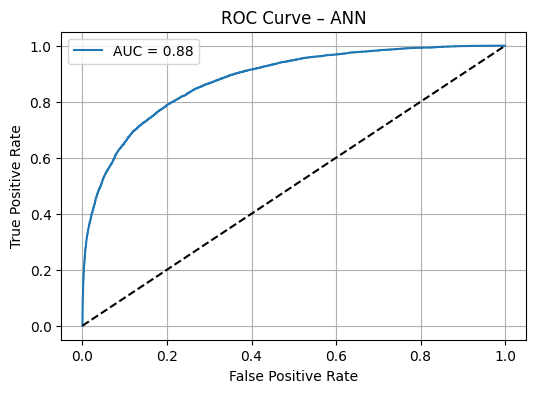

In [56]:
from imblearn.combine import SMOTEENN
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, BatchNormalization, Add, Activation


# Encode target
y_train_bin = y_train.replace({'No': 0, 'Yes': 1}).astype(np.float32)
y_test_bin = y_test.replace({'No': 0, 'Yes': 1}).astype(np.float32)

# Encode categorical features
le_loc = LabelEncoder()
X_train['Location_enc'] = le_loc.fit_transform(X_train['Location'])
X_test['Location_enc'] = le_loc.transform(X_test['Location'])

le_rain = LabelEncoder()
X_train['RainToday_enc'] = le_rain.fit_transform(X_train['RainToday'])
X_test['RainToday_enc'] = le_rain.transform(X_test['RainToday'])

# Normalize numerical features
num_cols = X_train.drop(columns=['Location', 'RainToday', 'Location_enc', 'RainToday_enc']).columns.tolist()
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

# Combine for SMOTEENN
X_train_full = np.concatenate([
    X_train_num,
    X_train[['Location_enc', 'RainToday_enc']].values
], axis=1)

# Apply SMOTEENN
smote = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_full, y_train_bin)

# Separate components
X_num_resampled = X_resampled[:, :X_train_num.shape[1]]
X_loc_resampled = X_resampled[:, X_train_num.shape[1]].astype(int)
X_rain_resampled = X_resampled[:, X_train_num.shape[1] + 1].astype(int)

# Embedding setup
n_location = X_train['Location_enc'].nunique()
n_rain = X_train['RainToday_enc'].nunique()
emb_dim_loc = min(50, (n_location + 1) // 2)
emb_dim_rain = min(10, (n_rain + 1) // 2)

# Model definition
input_num = Input(shape=(X_train_num.shape[1],))
input_loc = Input(shape=(1,))
input_rain = Input(shape=(1,))

embed_loc = Embedding(n_location, emb_dim_loc)(input_loc)
embed_loc = Flatten()(embed_loc)

embed_rain = Embedding(n_rain, emb_dim_rain)(input_rain)
embed_rain = Flatten()(embed_rain)

x = Concatenate()([input_num, embed_loc, embed_rain])

# Residual Block 1
x1 = Dense(256, activation='relu')(x)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x2 = Dense(256)(x1)
x2 = BatchNormalization()(x2)
x2 = Add()([x1, x2])
x2 = Activation('relu')(x2)
x2 = Dropout(0.3)(x2)

# Residual Block 2
x3 = Dense(128)(x2)
x3 = BatchNormalization()(x3)
shortcut = Dense(128)(x2)  # projection to match shape
x3 = Add()([shortcut, x3])
x3 = Activation('relu')(x3)
x3 = Dropout(0.3)(x3)

# Final layers
x_out = Dense(64, activation='relu')(x3)
x_out = BatchNormalization()(x_out)
x_out = Dropout(0.3)(x_out)

output = Dense(1, activation='sigmoid')(x_out)

model = Model(inputs=[input_num, input_loc, input_rain], outputs=output)
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
model.fit(
    [X_num_resampled, X_loc_resampled, X_rain_resampled],
    y_resampled,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# Predict on test set
y_prob = model.predict([
    X_test_num,
    X_test['Location_enc'].values.reshape(-1, 1),
    X_test['RainToday_enc'].values.reshape(-1, 1)
]).flatten()

# Tune threshold
best_f1 = 0
best_thresh = 0.5
for t in np.arange(0.1, 0.91, 0.05):
    y_pred = (y_prob >= t).astype(int)
    score = f1_score(y_test_bin, y_pred)
    if score > best_f1:
        best_f1, best_thresh = score, t

print(f"\nBest threshold = {best_thresh:.2f} → Best F1 = {best_f1:.4f}")

# Final evaluation
y_final = (y_prob >= best_thresh).astype(int)
print("\nFinal Results:")
print("Accuracy:", accuracy_score(y_test_bin, y_final))
print("F1 Score:", f1_score(y_test_bin, y_final))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_final))
print("Classification Report:\n", classification_report(y_test_bin, y_final))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – ANN")
plt.legend()
plt.grid()
plt.show()


**Final** **Results**

| **Model**                    | **Threshold** | **Precision (C1)** | **Recall (C1)** | **F1-Score (C1)** | **Accuracy** |
| ---------------------------- | ------------- | ------------------ | --------------- | ----------------- | ------------ |
| Logistic Regression          | 0.50          | 0.51               | 0.76            | 0.61              | 0.781        |
| Random Forest                | 0.50          | 0.75               | 0.46            | 0.57              | 0.845        |
| Tuned XGBoost                | 0.50          | 0.64               | 0.61            | 0.63              | 0.837        |
| ANN                | 0.30          | 0.55               | 0.73            | 0.63              | 0.807        |
| ANN + Embeddings             | 0.30          | 0.56               | 0.76            | 0.65              | 0.813        |
| ANN + Embeddings (0.35)      | 0.35          | 0.66               | 0.66            | 0.66              | 0.847        |
| XGBoost + ANN Ensemble       | 0.35          | 0.61               | 0.69            | 0.64              | 0.830        |
| Weighted Voting Ensemble     | 0.35          | 0.65               | 0.68            | 0.66              | 0.846        |
| TabNet                       | 0.65          | 0.61          | 0.65            | 0.63              | 0.830        |
|ANN(Final)| 0.75    | 0.62          | 0.70       | 0.6565       | 0.8358   |


 Our Best Model :
 ANN + Embeddings (0.35)

| Metric        | Value                        |
| ------------- | ---------------------------- |
| **Precision** | 0.66                         |
| **Recall**    | 0.66                         |
| **F1 Score**  | **0.66** (highest among all) |
| **Accuracy**  | **0.847** (highest overall)  |


It balances precision and recall perfectly, and its F1 score is the highest, which is crucial for imbalanced classification like rain prediction (where missing a rain day is bad, but false alarms are also costly).

 **Alternative** :

ANN(Final) with threshold 0.75: Slightly lower F1 (0.6565) but higher recall (0.70).We Use it if recall is more important than precision.